# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

**Заказчик**: интернет-магазин «Стримчик», который продаёт компьютерные игры по всему миру. 

**Данные**: данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах с 2014 по 2019 г. По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных.

**Цель работы**: Провести исследовательский анализ данных и установить параметры, влияющие на цену объектов, что позволило
бы остроить автоматизированную систему, отслеживающую аномалии и мошенническую деятельность.

**Основные задачи**:
1. Изучить таблицу с данными;
2. Подготовить данные (проверить на наличие пропусков и дубликатов, добавить новые столбцы и преобразовать данные в нужные типы, там где это необходимо); 
3. Провести исследовательский анализ данных:
* изучить параметры объектов и обработать обнаруженные аномалии, 
* изучить, как быстро продавались квартиры, 
* определить факторы, которые больше всего влияют на общую (полную) стоимость объекта, 
* рассчитать среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений и выделить населённые пункты с самой высокой и низкой стоимостью квадратного метра, 
* Определить, как стоимость объектов зависит от расстояния до центра города Санкт-Петербурга;
4. Написать общий вывод.

**Описание данных**:

* **airports_nearest** — расстояние до ближайшего аэропорта в метрах (м)
* **balcony** — число балконов
* **ceiling_height** — высота потолков (м)
* **cityCenters_nearest** — расстояние до центра города (м)
* **days_exposition** — сколько дней было размещено объявление (от публикации до снятия)
* **first_day_exposition** — дата публикации
* **floor** — этаж
* **floors_total** — всего этажей в доме
* **is_apartment** — апартаменты (булев тип)
* **kitchen_area** — площадь кухни в квадратных метрах (м²)
* **last_price** — цена на момент снятия с публикации
* **living_area** — жилая площадь в квадратных метрах (м²)
* **locality_name** — название населённого пункта
* **open_plan** — свободная планировка (булев тип)
* **parks_around3000** — число парков в радиусе 3 км
* **parks_nearest** — расстояние до ближайшего парка (м)
* **ponds_around3000** — число водоёмов в радиусе 3 км
* **ponds_nearest** — расстояние до ближайшего водоёма (м)
* **rooms** — число комнат
* **studio** — квартира-студия (булев тип)
* **total_area** — общая площадь квартиры в квадратных метрах (м²)
* **total_images** — число фотографий квартиры в объявлении


## Открываем файл с данными и изучаем общую информацию. 

### Загрузим данные из файла в датафрейм.

In [1]:
# Импортируем библиотеку pandas:
import pandas as pd

# Импортируем подбиблиотеку pyplot из библиотеки matplotlib:
import matplotlib.pyplot as plt

In [2]:
# Считываем данные из csv-файла в датафрейм и сохраняем в переменную data:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

### Изучим общую информации о полученном датафрейме.

In [3]:
# Выводим первые 10 строк датафрейфма на экранс помощью метода head():
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [4]:
#Выводим основную информацию о датафрейме с помощью метода info():
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

В датафрейме имеются пропуски, нужно будет их проанализировать, также необходимо изменить тип некоторых данных и соотнести данные с единицами измерения, в которых они должны быть записаны.

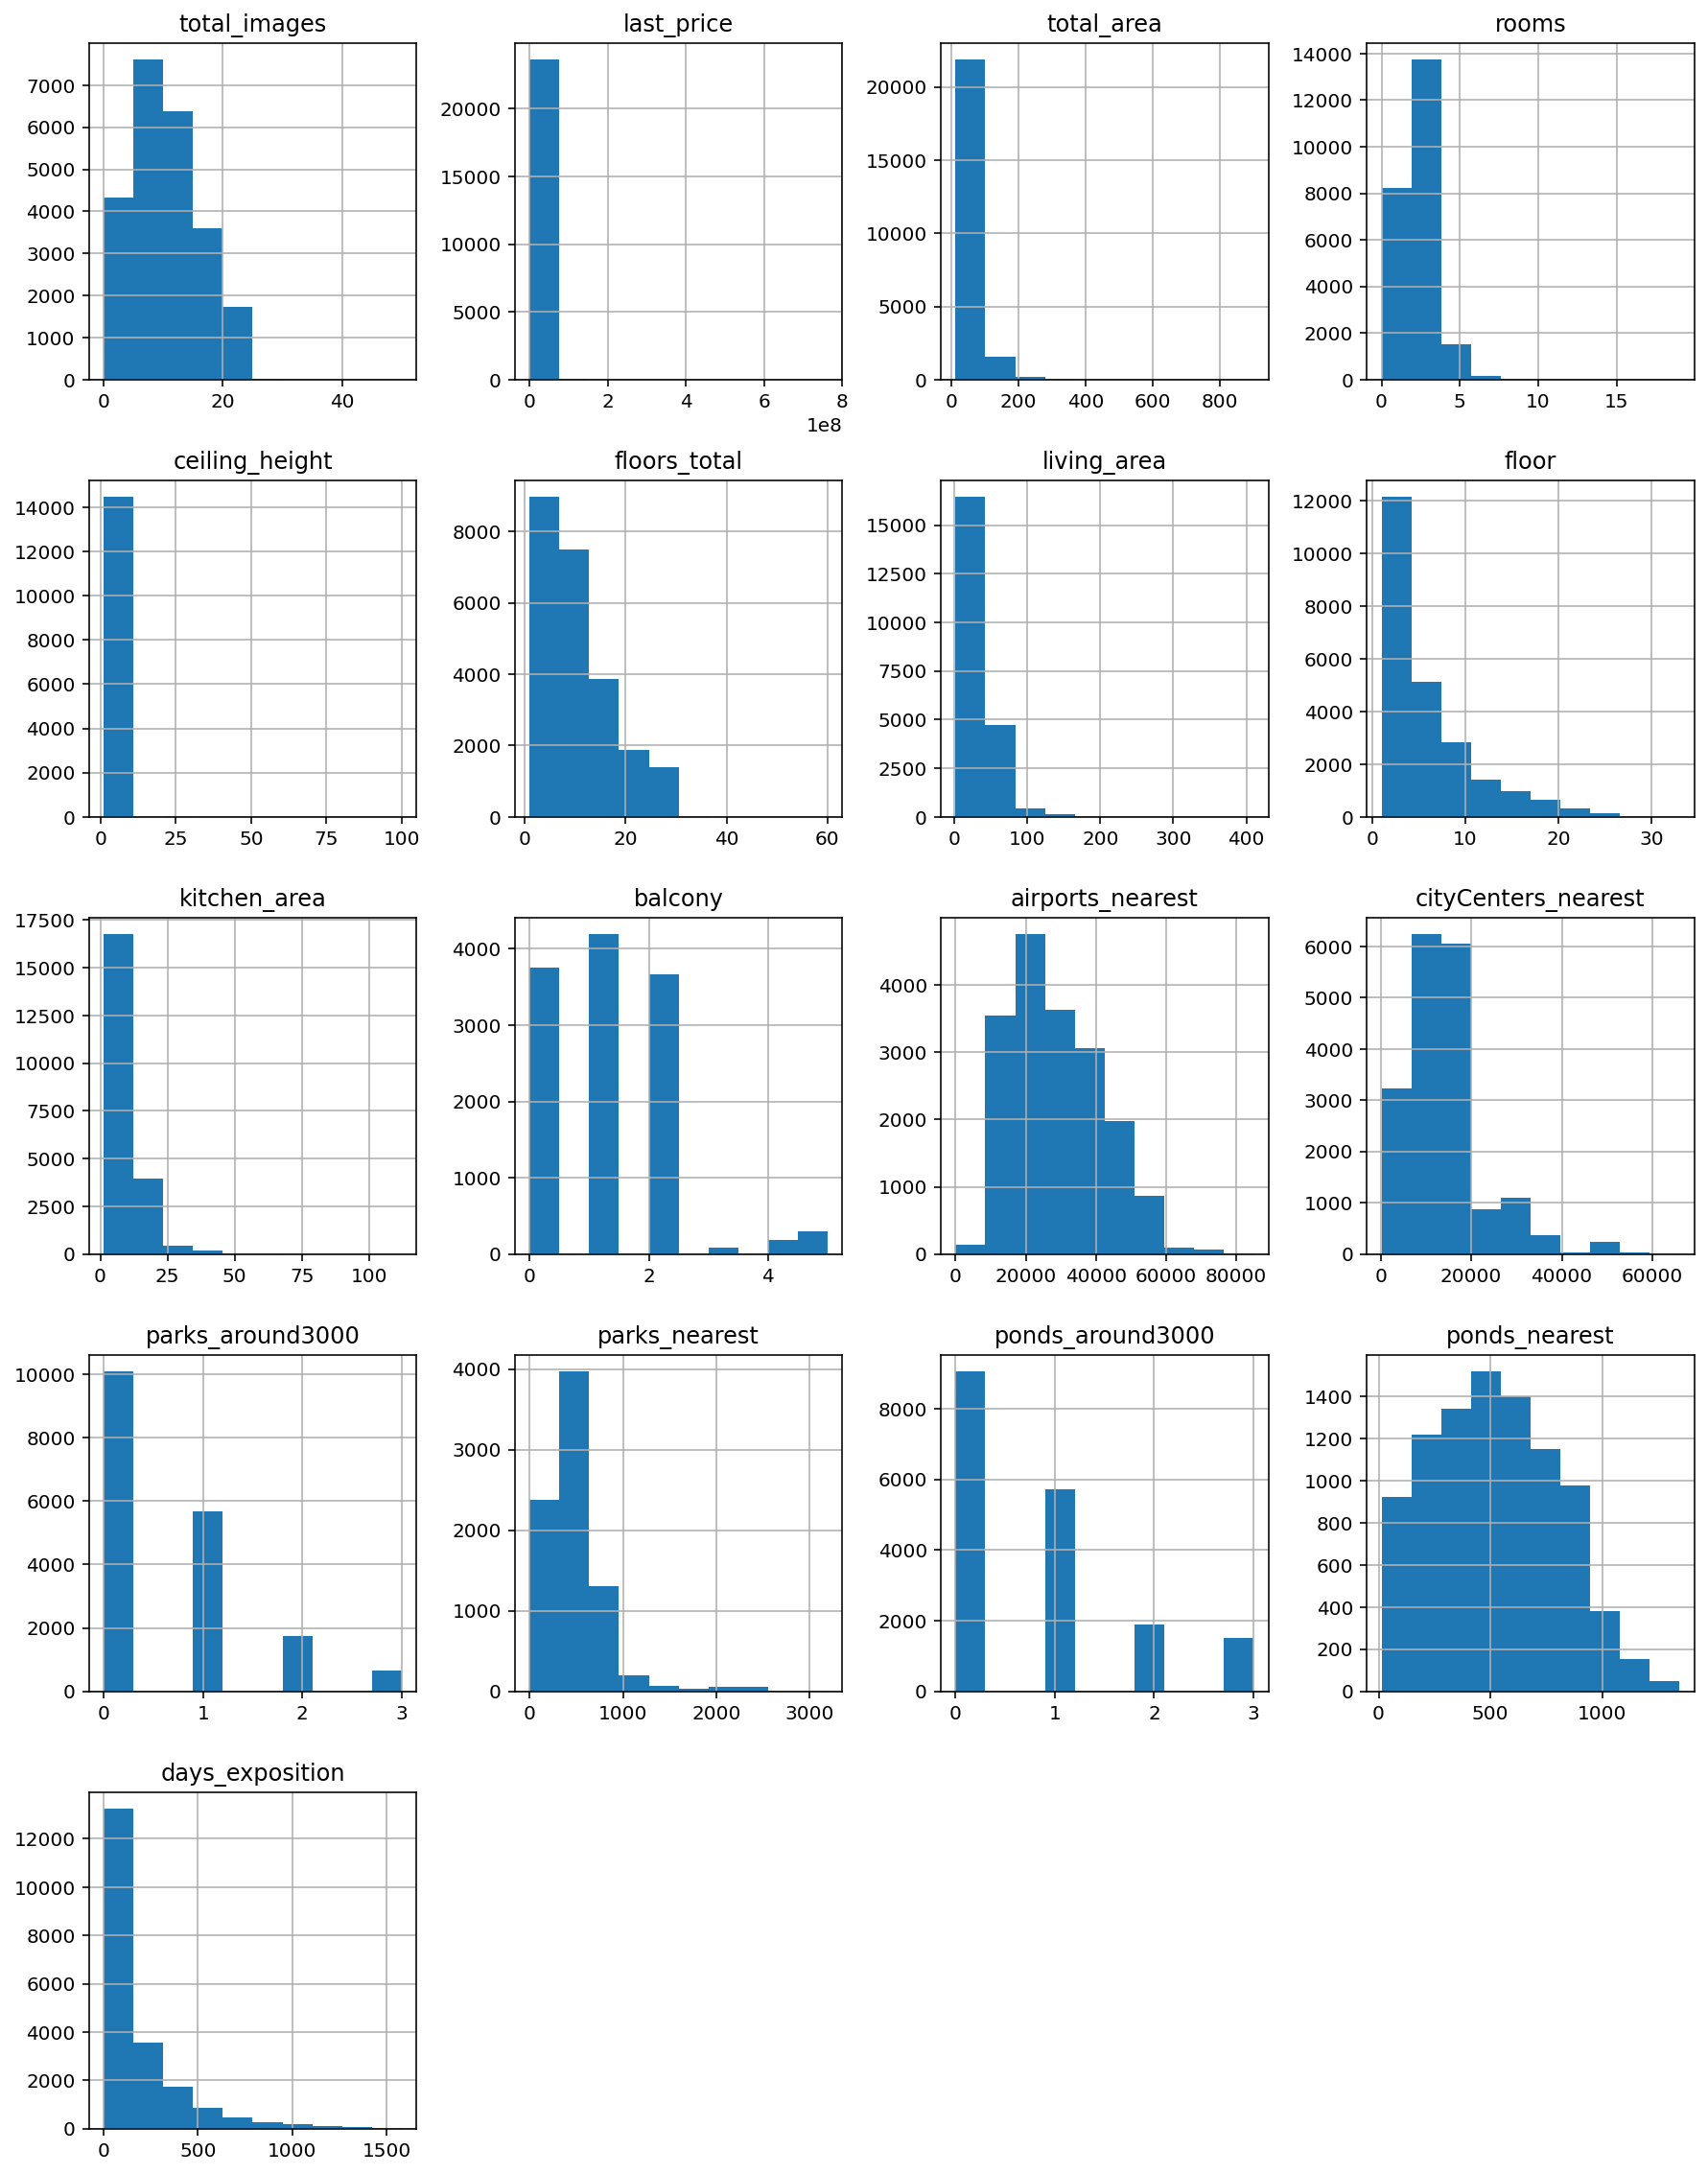

In [5]:
# Вводим конфигурацию,улучшающую четкость картинок во всем проекте:

%config InlineBackend.figure_format = 'retina'

# Строим общую гистограмму для всех числовых столбцов таблицы методом hist(),

data.hist(figsize=(15, 20));

Как можно увидеть из полученных гистограмм, в данных присутствуют выбросы, в особенности в таких столбцах, как total_images, last_price, total_area, rooms, ceiling_height, floors_total, livining area и kitchen_area.  
По некоторым из полученных гистограмм можно сделать вывод, что чаще всего в выборке встречаются 3-х комнатные квартиры с жилой площадью не более 50 м2, в том числе кухни не более 12 м2,  с числом балконов от 0 до 2, на этаже не выше 5-го в домах с общим числом этажей не более 9, с числом фотографий в объявлении около 10 штук. При этом чаще встречаются дома расположенные примерно в 20 км от аэропорта и  в 4-20 км от центра, не имеющие в радиусе 3 км парков и водоемов. Стоимость ни одной из квартир не превышает 100 млн руб. С момента размещения объекта на сайте до его продажи в среднем проходит не более 200 дней.

## Предобработка данных

### Исследование и заполнение пропусков в данных.

#### Определяем в каких столбцах есть пропуски: 

In [6]:
#Выводим количество пропущенных значений для каждого столбца, используя методы isna() и sum():

data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [7]:
# check
# пропущенные значения бары

def pass_value_barh(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind = 'barh', figsize = (19,6), rot = -5, legend = False, fontsize = 16)
            .set_title('Пример' + "\n", fontsize = 22, color = 'SteelBlue')    
        );    
    except:
        print('пропусков не осталось :) или произошла ошибка в первой части функции ')

#### Заполняем или удаляем пропущенные значения, там где это возможно. 

В столбце с числом балконов в квартире пропуски заполним значением 0, предполагая, что пропуск означает отсутствие балкона в квартире.

In [9]:
# Заполним  пропуски  в столбце 'balcony' методом fillna(): 

data['balcony'] = data['balcony'].fillna(0)


В столбце с названием населенного пункта пропуски заполним значением unknown.

In [10]:
# Заполним  пропуски  в столбце 'locality_name' методом fillna(): 

data['locality_name'] = data['locality_name'].fillna('Unknown')

В столбце с информацией о том, является ли квартира аппартаментами, считаем, что пропуски означают, что не является, поэтому пропуски заполним значением False, учитывая, что в документации в этом столбце должен быть булевый тип данных.

In [11]:
# Заполним  пропуски в столбце 'is_apartment' методом fillna(): 

data['is_apartment'] = data['is_apartment'].fillna(False)

Пропуски в столбце с числом этажей в доме можно удалить, так как их количество их минимально.

In [12]:
# Удаляем пропуски в столбце 'floors_total' методом dropna() и перезаписываем индексы методом reset_index():
data = data.dropna(subset=['floors_total']).reset_index()


В остальных случаях пропуски оставим незаполненными, так как логичную замену предложить невозможно, а синтетическими данными их лучше не заполнять.

In [13]:
# Проверяем, заполнились ли пропуски:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23613 entries, 0 to 23612
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 23613 non-null  int64  
 1   total_images          23613 non-null  int64  
 2   last_price            23613 non-null  float64
 3   total_area            23613 non-null  float64
 4   first_day_exposition  23613 non-null  object 
 5   rooms                 23613 non-null  int64  
 6   ceiling_height        14495 non-null  float64
 7   floors_total          23613 non-null  float64
 8   living_area           21743 non-null  float64
 9   floor                 23613 non-null  int64  
 10  is_apartment          23613 non-null  bool   
 11  studio                23613 non-null  bool   
 12  open_plan             23613 non-null  bool   
 13  kitchen_area          21382 non-null  float64
 14  balcony               23613 non-null  float64
 15  locality_name      

#### Причины, которые могли привести к пропускам в данных.

* Проблемы могли возникнуть на этапе загрузки и на этапе выгрузки данных. Автоматизированная система сбора информации дала сбой.
* Пользователь не предоставил всю необходимую для заполнения таблицы информацию о продаваемой квартире;
* Объединение таблиц.
* Некоторые столбцы таблицы необязательны для заполнения.


### Изменение типов данных

#### Заменим тип данных в столбце с датой публикации.

In [14]:
# С помощью метода to_datetime() переведем строки в столбце first_day_exposition в даты:

data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')



В данном случае замена типа данных необходима, чтобы в дальнейшем, можно было выполнять операции с датами.

#### Заменим тип данных в столбце с общим числом этажей в доме и балконов.

In [15]:
# С помощью метода astype() переведем вещественный тип данных в столбцах floors_total и balcony в целочисленный:

data['floors_total'] = data['floors_total'].astype('int64')
data['balcony'] = data['balcony'].astype('int64')

In [16]:
# Проверяем, именился ли тип данных:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23613 entries, 0 to 23612
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   index                 23613 non-null  int64         
 1   total_images          23613 non-null  int64         
 2   last_price            23613 non-null  float64       
 3   total_area            23613 non-null  float64       
 4   first_day_exposition  23613 non-null  datetime64[ns]
 5   rooms                 23613 non-null  int64         
 6   ceiling_height        14495 non-null  float64       
 7   floors_total          23613 non-null  int64         
 8   living_area           21743 non-null  float64       
 9   floor                 23613 non-null  int64         
 10  is_apartment          23613 non-null  bool          
 11  studio                23613 non-null  bool          
 12  open_plan             23613 non-null  bool          
 13  kitchen_area    

В данном случае замена типа данных необходима, так как число балконов и этажей всегда целые числа.

### Обработка неявных дубликатов

#### Изучаем уникальные значения в столбце с названиями. 

In [17]:
# Выводим на экран уникальные значения столбца 'locality_name' методом unique():
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [18]:
# Подсчитываем количество уникальных значений в столбце 'locality_name' методом nunique():
data['locality_name'].nunique()

365

#### Устраняем неявные дубликаты 

In [19]:
# Вводим функцию clean(), позволяющую очистить столбец 'locality_name' от слов, приводящих к появлению дубликатов:
def clean(name):
    
    # Разделяем каждое строковое значение в столбце по пробелам:
    splited_name = name.split(' ')
    
    # Создаем список в виде структуры данных, которая не содержит повторений, в нем записываем слова, которые 
    # необходимо удалить из столбца:
    words_for_remove = ({'село', 'поселок', 'посёлок', 'городского', 'типа','городской','деревня',
                         'садовое', 'товарищество','садоводческое','некоммерческое','станции',
                         'коттеджный', 'при', 'железнодорожной'})
    
   # Создаем цикл, который позволяет отфильтровать слова, которые нужно оставить в столбце, метод lower() используем 
   # для перевода всех букв в нижний регистр: 
    good_words = [word for word in splited_name if word.lower() not in words_for_remove]
   
   # Возвращаем отфильтрованные значения, преобразованные из списка в строку методом join():
    return ' '.join(good_words)

data['locality_name'] = data['locality_name'].apply(clean)


In [20]:
# Проверяем методом unique(), устранили ли мы дубликаты в столбце 'locality_name':
data['locality_name'].unique()



array(['Санкт-Петербург', 'Шушары', 'Янино-1', 'Парголово', 'Мурино',
       'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин', 'Кудрово',
       'Коммунар', 'Колпино', 'Красный Бор', 'Гатчина', 'Фёдоровское',
       'Выборг', 'Кронштадт', 'Кировск', 'Новое Девяткино',
       'Металлострой', 'Лебяжье', 'Сиверский', 'Молодцово',
       'Кузьмоловский', 'Новая Ропша', 'Павловск', 'Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк',
       'Куттузи', 'Аннино', 'Ефимовский', 'Плодовое', 'Заклинье',
       'Торковичи', 'Первомайское', 'Красное', 'Понтонный', 'Сясьстрой',
       'Старая', 'Лесколово', 'Новый Свет', 'Сланцы', 'Путилово',
       'Ивангород', 'Шлиссельбург', 'Никольское', 'Зеленогорск',
       'Сосновый Бор', 'Оржицы', 'Кальтино', 'Романовка', 'Бугры',
       'Рощино', 'Кириши', 'Луга', 'Волосово', 'Отрадное', 'Павлово',
       'Оредеж', 'Копорье', 'Молодёжное', 'Тихвин', 'Победа', 'Нурма',
       'Синявино', 'Тосно', 'Стрельна', 'Бокситогорск', 'Але

In [21]:
# Обнаружив, что в результате работы фильтрации данных значение'Красное Село' превратилось в
# 'Красное', вовзращаем утраченное написание методом str.replace():

data['locality_name'] = data['locality_name'].str.replace('Красное','Красное Село')

# и проверяем, что получилось:
data['locality_name'].unique()

array(['Санкт-Петербург', 'Шушары', 'Янино-1', 'Парголово', 'Мурино',
       'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин', 'Кудрово',
       'Коммунар', 'Колпино', 'Красный Бор', 'Гатчина', 'Фёдоровское',
       'Выборг', 'Кронштадт', 'Кировск', 'Новое Девяткино',
       'Металлострой', 'Лебяжье', 'Сиверский', 'Молодцово',
       'Кузьмоловский', 'Новая Ропша', 'Павловск', 'Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк',
       'Куттузи', 'Аннино', 'Ефимовский', 'Плодовое', 'Заклинье',
       'Торковичи', 'Первомайское', 'Красное Село', 'Понтонный',
       'Сясьстрой', 'Старая', 'Лесколово', 'Новый Свет', 'Сланцы',
       'Путилово', 'Ивангород', 'Шлиссельбург', 'Никольское',
       'Зеленогорск', 'Сосновый Бор', 'Оржицы', 'Кальтино', 'Романовка',
       'Бугры', 'Рощино', 'Кириши', 'Луга', 'Волосово', 'Отрадное',
       'Павлово', 'Оредеж', 'Копорье', 'Молодёжное', 'Тихвин', 'Победа',
       'Нурма', 'Синявино', 'Тосно', 'Стрельна', 'Бокситогорск',

In [22]:
# Подсчитываем количество уникальных значений в столбце 'locality_name' и сравниваем с ранее полученным выше значением:
data['locality_name'].nunique()

306

#### Находим и устраняем редкие и выбивающиеся значения

Ранее, при построении общей гистограммы для всех числовых столбцов таблицы, было выявлено наличие 
выбросов в столбцах total_images, last_price, total_area, rooms, ceiling_height, floors_total, 
livining area и kitchen_area. Для более полной оценки наличия выбросов в выборке, посмотрим на 
числовое описание данных.  

In [23]:
# Посмотрим, есть ли выбросы в данных, вызвав метод describe(), результат 
# работы которого - список характерных значений:

data.describe()

,index,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23613.000000,23613.000000,2.361300e+04,23613.000000,23613.000000,14495.000000,23613.000000,21743.000000,23613.000000,21382.000000,23613.000000,18081.000000,18104.000000,18105.000000,8045.000000,18105.000000,9061.000000,20441.000000
mean,11850.663279,9.874518,6.540555e+06,60.340678,2.071147,2.771495,10.673824,34.462781,5.877313,10.564128,0.593063,28788.008185,14185.084015,0.611433,490.554630,0.770119,518.209469,180.884839
std,6843.196902,5.681541,1.090172e+07,35.648988,1.078380,1.261445,6.597173,22.037433,4.873539,5.904316,0.960307,12626.209956,8614.132292,0.802168,341.336698,0.939075,277.887489,219.685543
min,0.000000,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,5923.000000,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18575.000000,9233.750000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,11856.000000,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,0.000000,26726.000000,13093.000000,0.000000,455.000000,1.000000,503.000000,95.000000
75%,17779.000000,14.000000,6.799000e+06,69.800000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,1.000000,37242.000000,16287.000000,1.000000,612.000000,1.000000,730.000000,232.000000
max,23698.000000,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


В полученной таблице можно увидеть редкие и выбивающиеся значения в столбцах, выбросы в которых были выявлены ранее на общей гистрограмме, например, 50 фотографий в столбце total_images, цена 763 млн в столбце last_price, общая площадь квартиры 900 м2 в стобце total_area, 19 комнат в столбце rooms, высота потолка 1 м и 100 м в стобце ceiling_height, 60 этажей в доме в столбце floors_total, жилая площадь 409,7 м2 в столбце living_area, 33 этаж в доме в стобце floor и 112 м2 площадь кухни в столбце kitchen_area. Конечно, большее внимание, стоит обратить на такие значимые параметры, как среднее арифметическое (mean), медиана (50 %) и стандартное отклонение (std), показывающие насколько значения выборке однородны. Так в тех столбцах,где стандартное отклонение велико, в наборе данных могут быть серьёзные аномалии или выбросы, что в том числе можно увидеть и в столбцах упомянутых ранее. В некоторых случаях подобным признаком может являться и сильное различие между медианой и средним арифметическим. 
 

Предположим ,что в столбце ceiling_height значения высоты потолков 25 м и 32 м на самом деле вещественные значения: 2.5 м и 3.2 м, обработаем эти аномалии.

23613

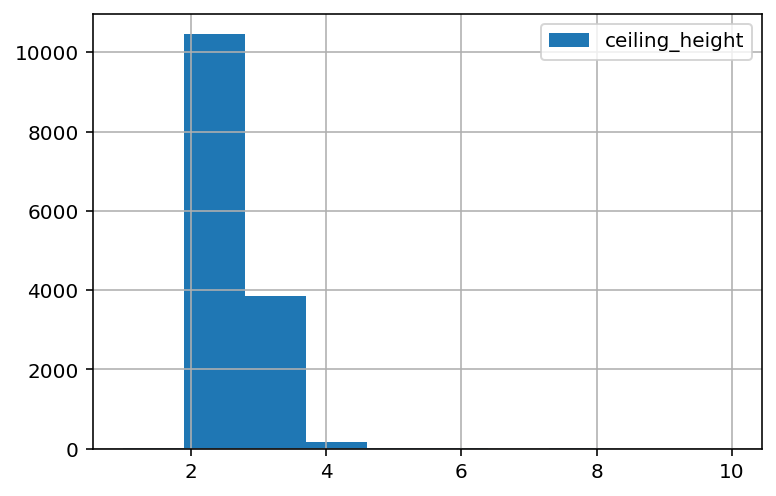

In [24]:
# Каждое значение столбца 'ceiling_height' равное 10 и более, делим на 10, 
# используя метод loc():

data.loc[data['ceiling_height'] >= 10, 'ceiling_height'] = data.loc[data['ceiling_height'] >= 10, 'ceiling_height'] / 10         

# Проверяем изменились ли значения на гистрограмме и число строк в таблице:
data['ceiling_height'].hist(legend=True);

len(data)

Чтобы удалить редкие и выбивающиеся значения, которые были обнаружены, удалим все значения, которые превышают 99,5 % значений в выделенных ранее столбцах.

Удалим редкие и выбивающиеся значения из столбца с общей площадью квартиры. 

In [25]:
# Смотрим  количество уникальных значений столбце 'total_area', результат 
# преобразуем в датарфрейм методом to_frame():

data['total_area'].value_counts().to_frame()

,total_area
45.00,419
42.00,383
60.00,347
31.00,346
44.00,345
...,...
63.68,1
151.50,1
30.11,1
48.77,1


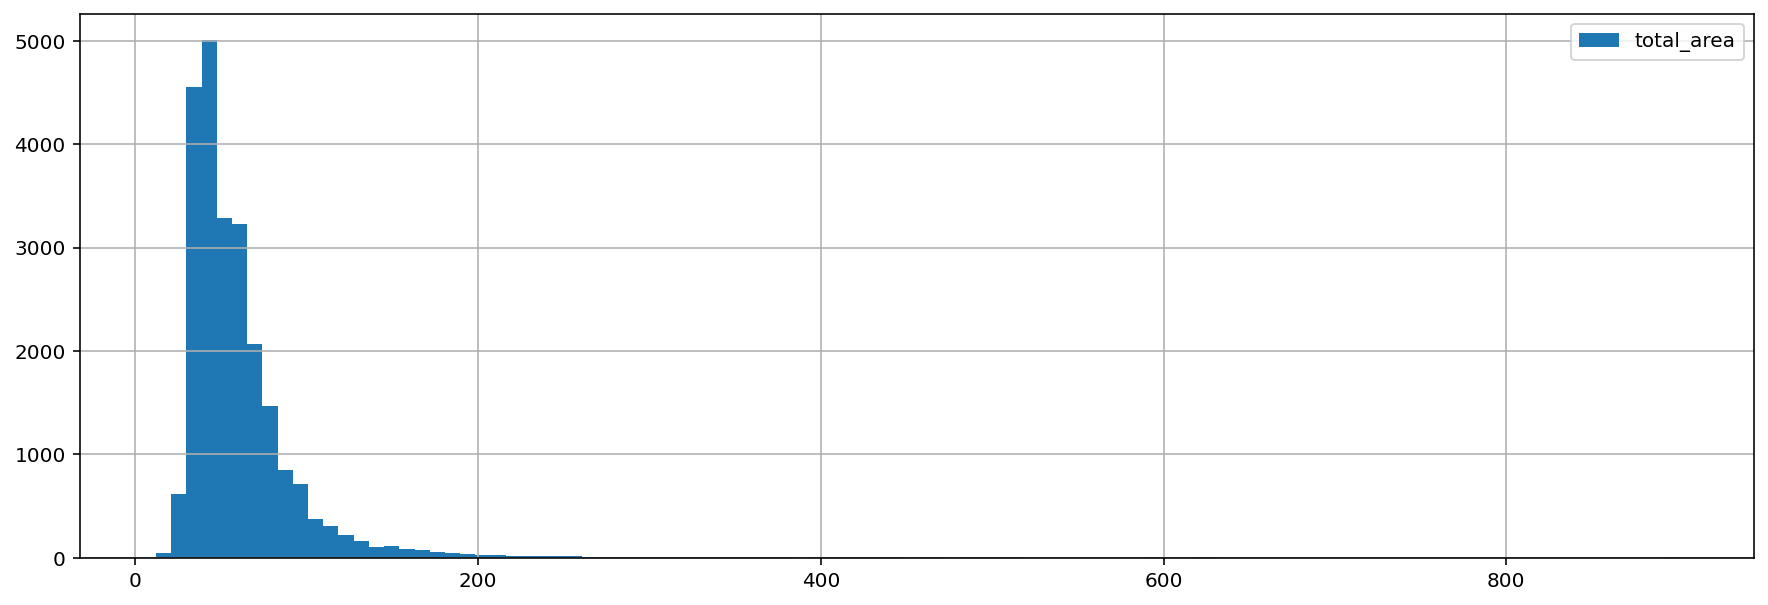

In [26]:
# Строим гистрограмму для столбца 'total_area' методом hist():
data['total_area'].hist(bins = 100, figsize = (15,5),legend=True);

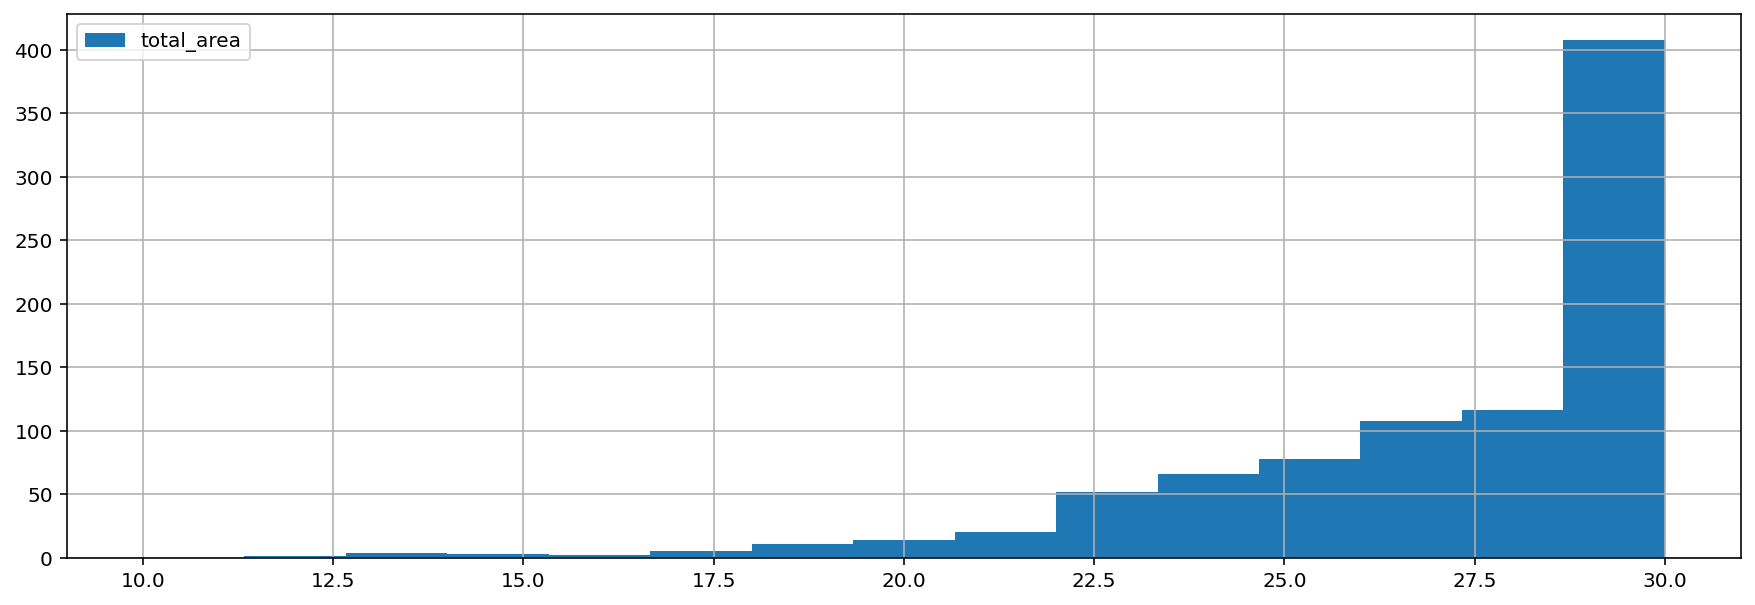

In [27]:
# Смотрим какие значения являются редкими и аномальными, для этого с помощью 
# параметра range ограничим интересующие нас значения  в левой части графика:
data['total_area'].hist(bins = 15, figsize = (15,5), range=(10,30), legend=True);

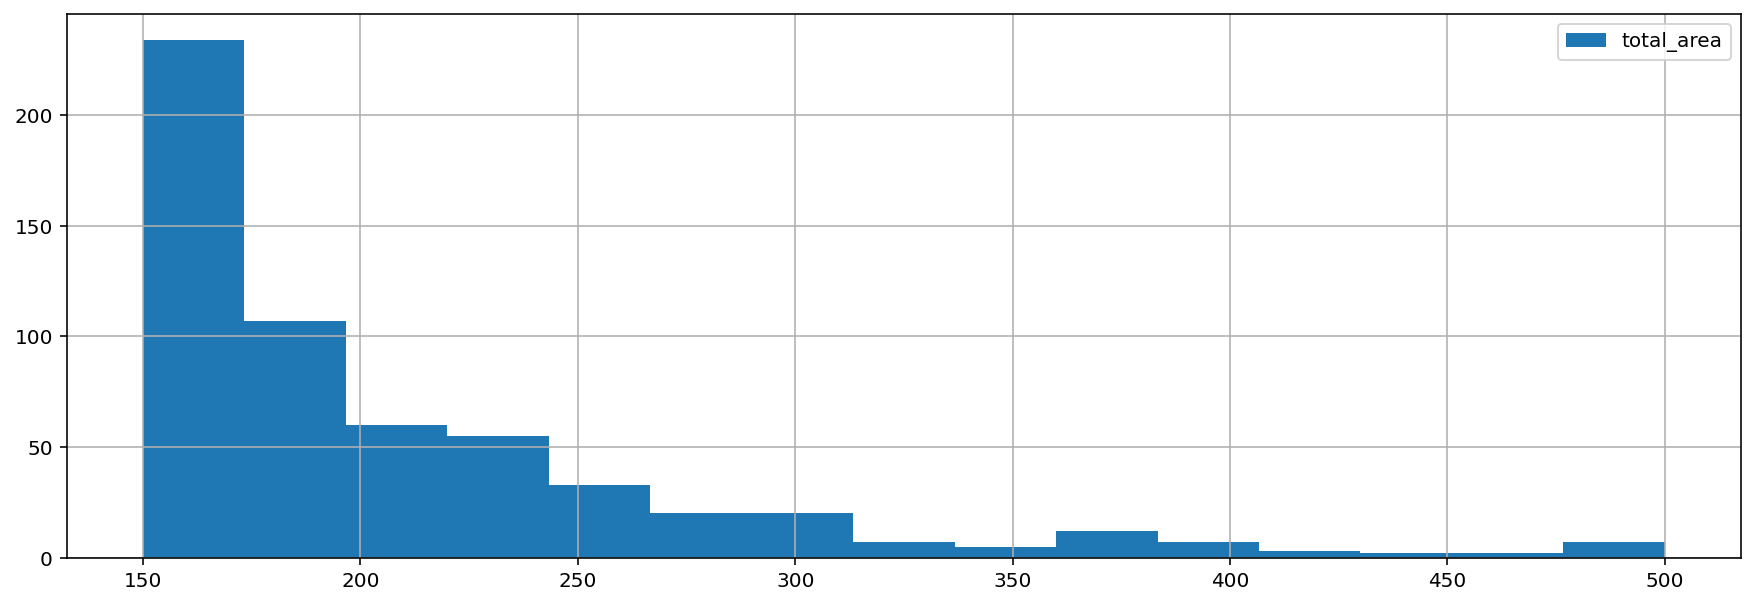

In [28]:
# Смотрим какие значения являются редкими и аномальными, для этого с помощью 
# параметра range ограничим интересующие нас значения в правой части графика:
data['total_area'].hist(bins = 15, figsize = (15,5), range=(150,500), legend=True);

На основании полученных данных будем считать общую площадь квартиры менее 22-ти и более 250-ти квадратных метров редкостью или аномалией, мешающей решению нашей задачи. Удалим все значения вне этого диапазона.

In [29]:
# Методом логической индексации отфильтруем значения в столбце'total_area', 
# учитывая, что пропусков столбце нет:

data = data.loc[(data['total_area'] >= 22) & (data['total_area'] <= 250)]

In [30]:
# Проверим, сколько осталось строк в датафрейме:
len(data)

23442

Удалим редкие и выбивающиеся значения из столбца с высотой потолков. 

In [31]:
# Смотрим  количество уникальных значений столбце 'ceiling_height', результат 
# преобразуем в датарфрейм методом to_frame():

data['ceiling_height'].value_counts().to_frame()

,ceiling_height
2.50,3516
2.60,1643
2.70,1575
3.00,1099
2.80,985
...,...
3.59,1
4.90,1
10.00,1
4.40,1


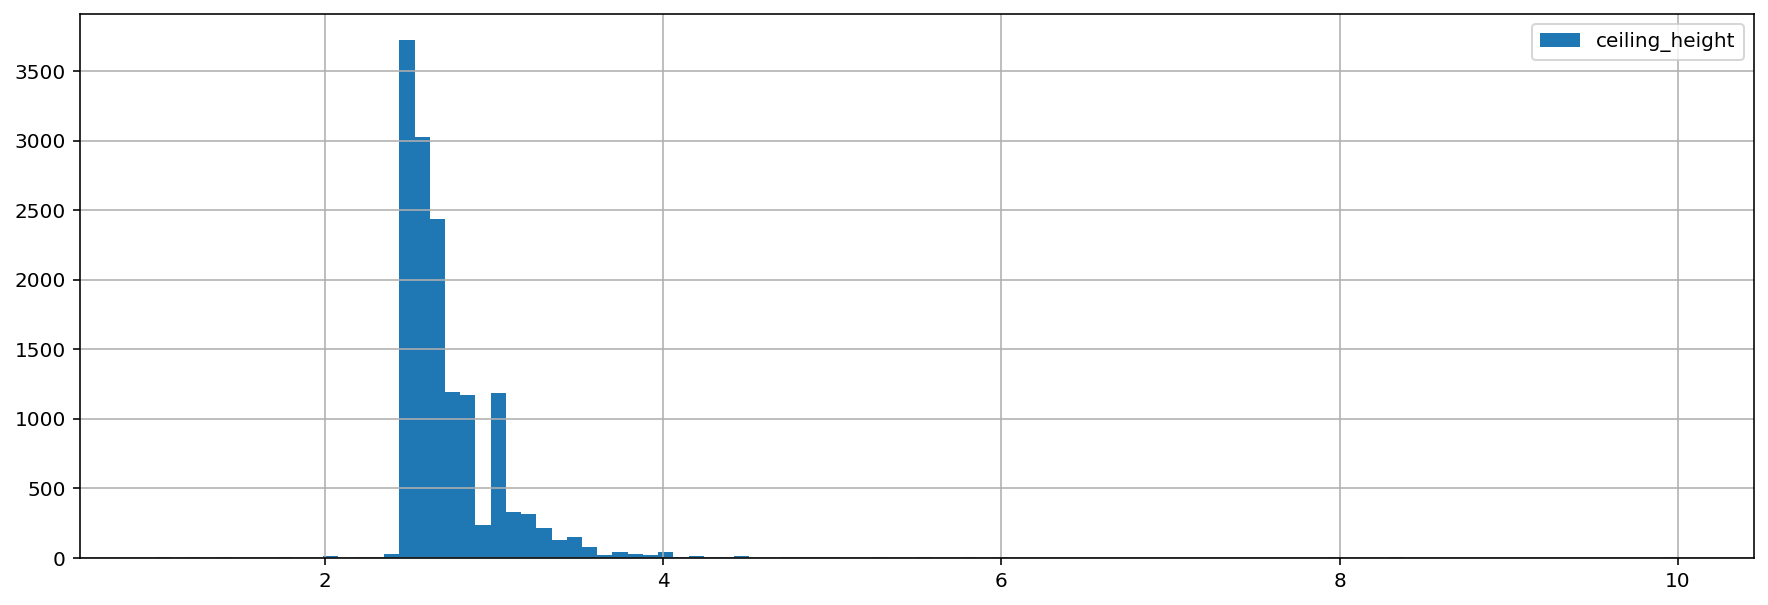

In [32]:
# Строим гистрограмму для столбца 'ceiling_height' методом hist():
data['ceiling_height'].hist(bins = 100, figsize = (15,5), legend=True);

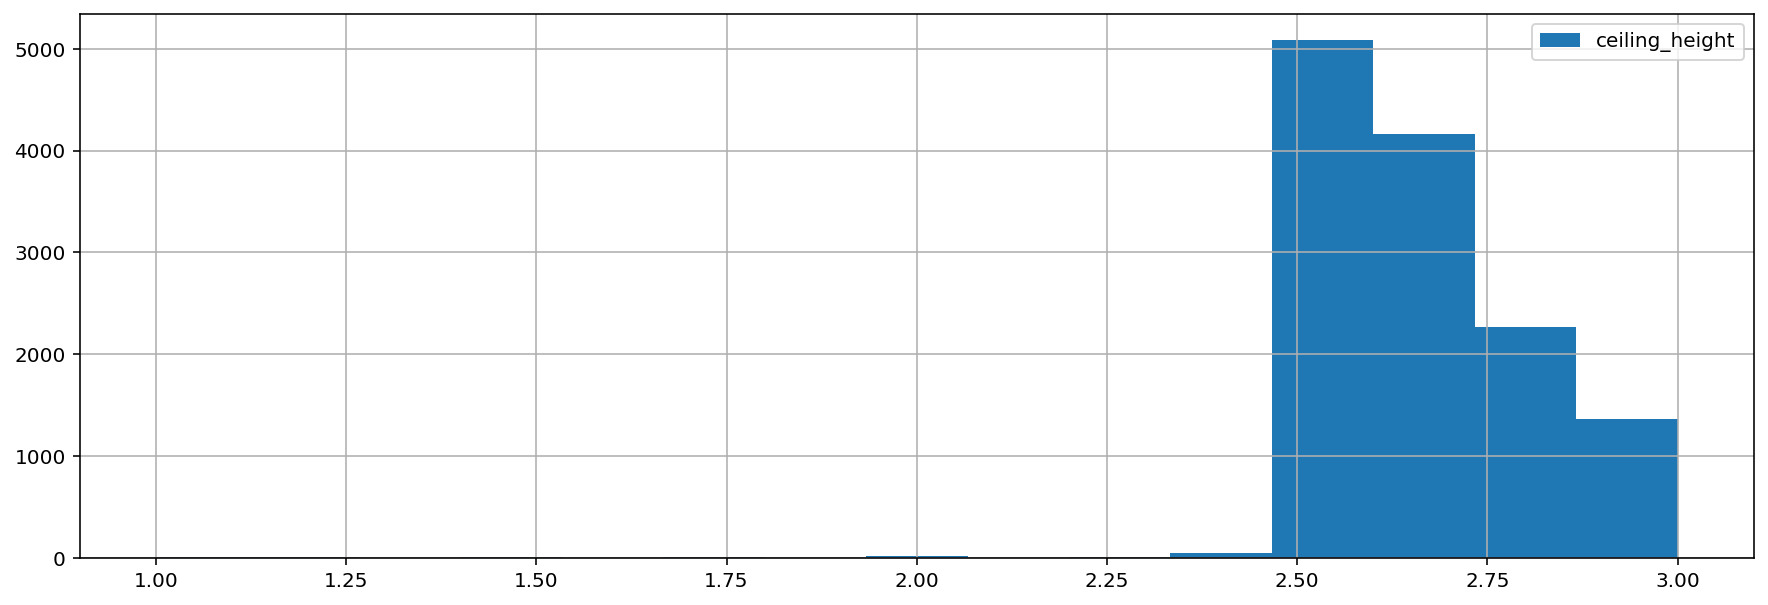

In [33]:
# Смотрим какие значения являются редкими и аномальными, для этого с помощью 
# параметра range ограничим интересующие нас значения  в левой части графика:
data['ceiling_height'].hist(bins = 15, figsize = (15,5), range=(1,3), legend=True);

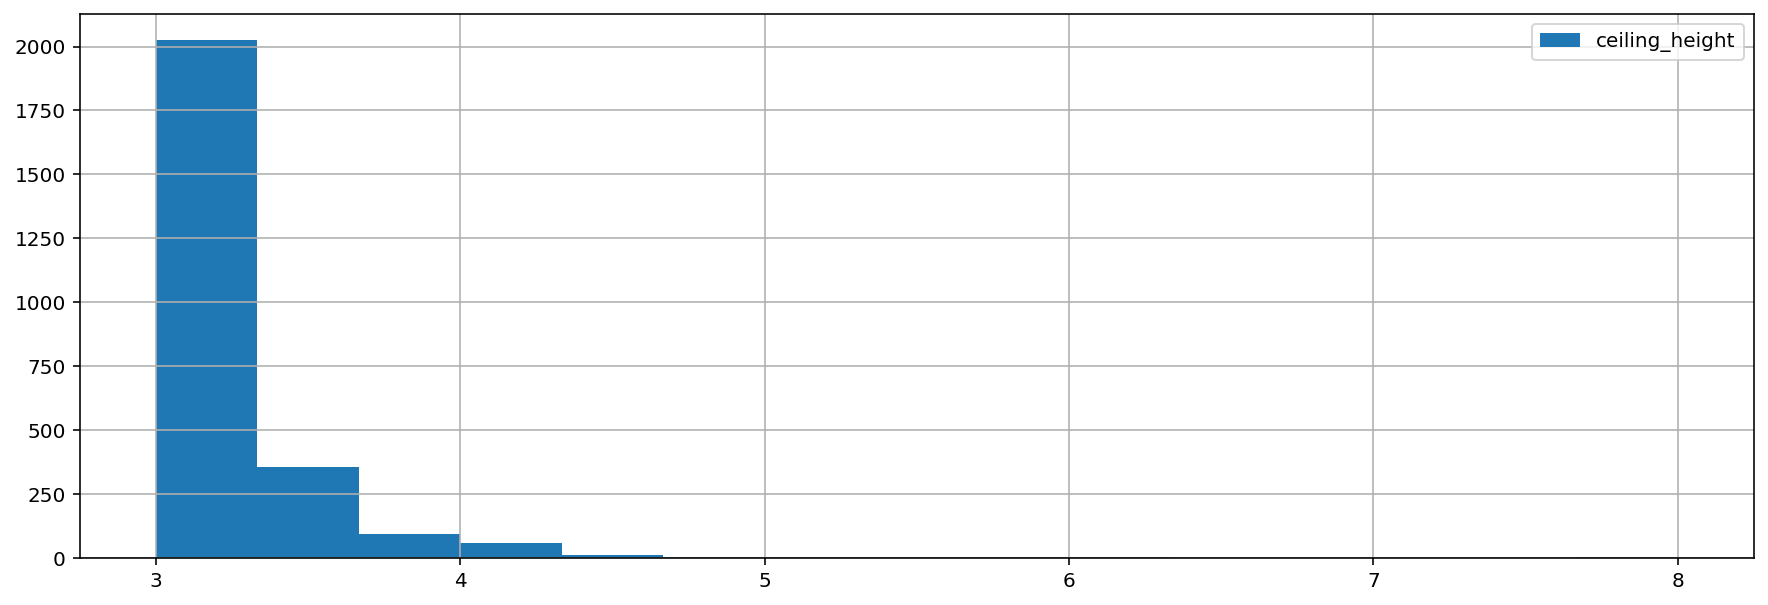

In [34]:
# Смотрим какие значения являются редкими и аномальными, для этого с помощью 
# параметра range ограничим интересующие нас значения в правой части графика:
data['ceiling_height'].hist(bins = 15, figsize = (15,5), range=(3,8), legend=True);

На основании полученных данных будем считать высоту потолка менее 2,5 и более 4 метров редкостью или аномалией, мешающей решению нашей задачи. Удалим все значения вне этого диапазона.

In [35]:
# Методом логической индексации отфильтруем значения в столбце'ceiling_height', 
# учитывая, что в столбце есть пропуски, которые не нужно удалять:

data = data.loc[(data['ceiling_height'] >= 2.5) & (data['ceiling_height'] <= 4) | (data['ceiling_height'].isna())]

In [36]:
# Проверим, сколько осталось строк в датафрейме:
len(data)

23322

Удалим редкие и выбивающиеся значения из столбца сколько дней было размещено объявление. 

In [37]:
# Смотрим  количество уникальных значений столбце 'days_exposition', результат 
# преобразуем в датарфрейм методом to_frame():

data['days_exposition'].value_counts().to_frame()

,days_exposition
45.0,869
60.0,537
7.0,231
30.0,205
90.0,195
...,...
969.0,1
1147.0,1
1148.0,1
1345.0,1


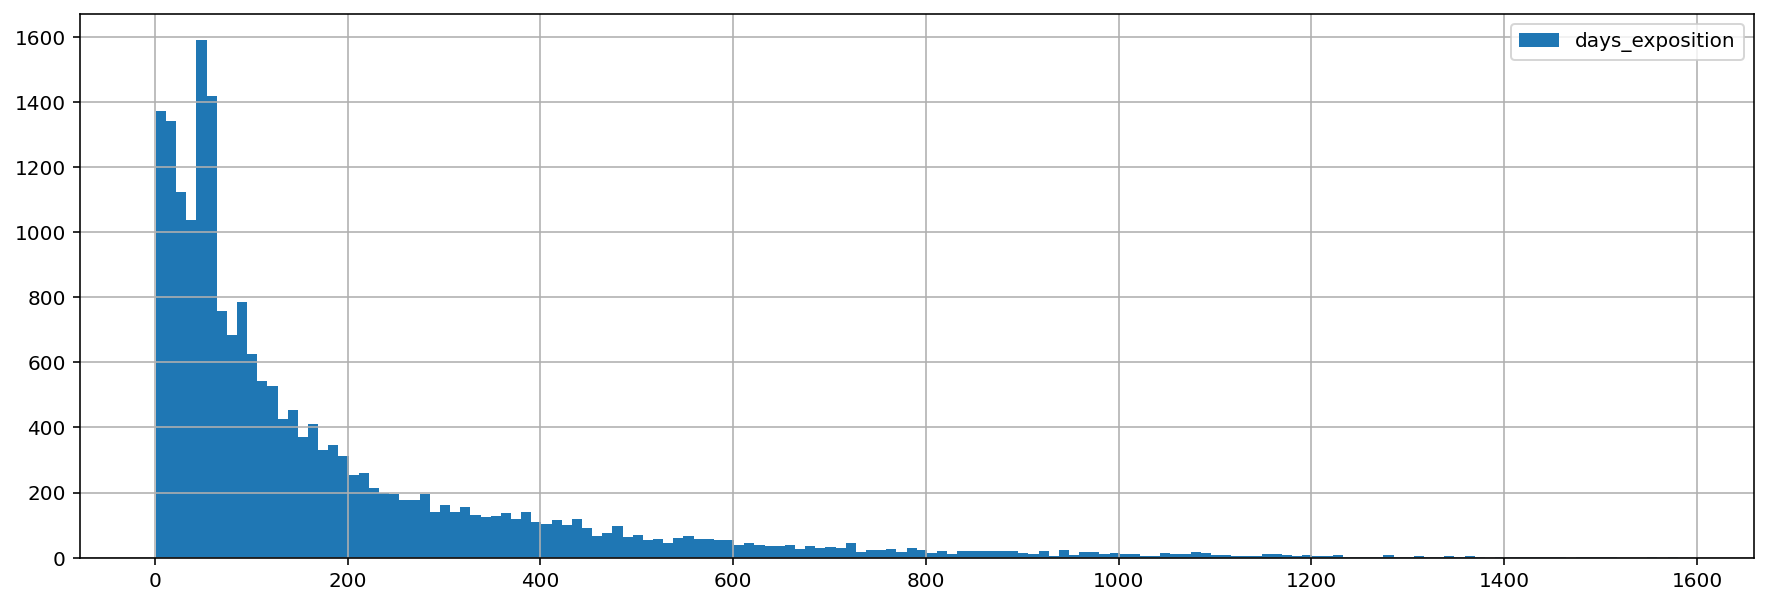

In [38]:
# Строим гистрограмму для столбца 'days_exposition' методом hist():
data['days_exposition'].hist(bins = 150, figsize = (15,5), legend=True);

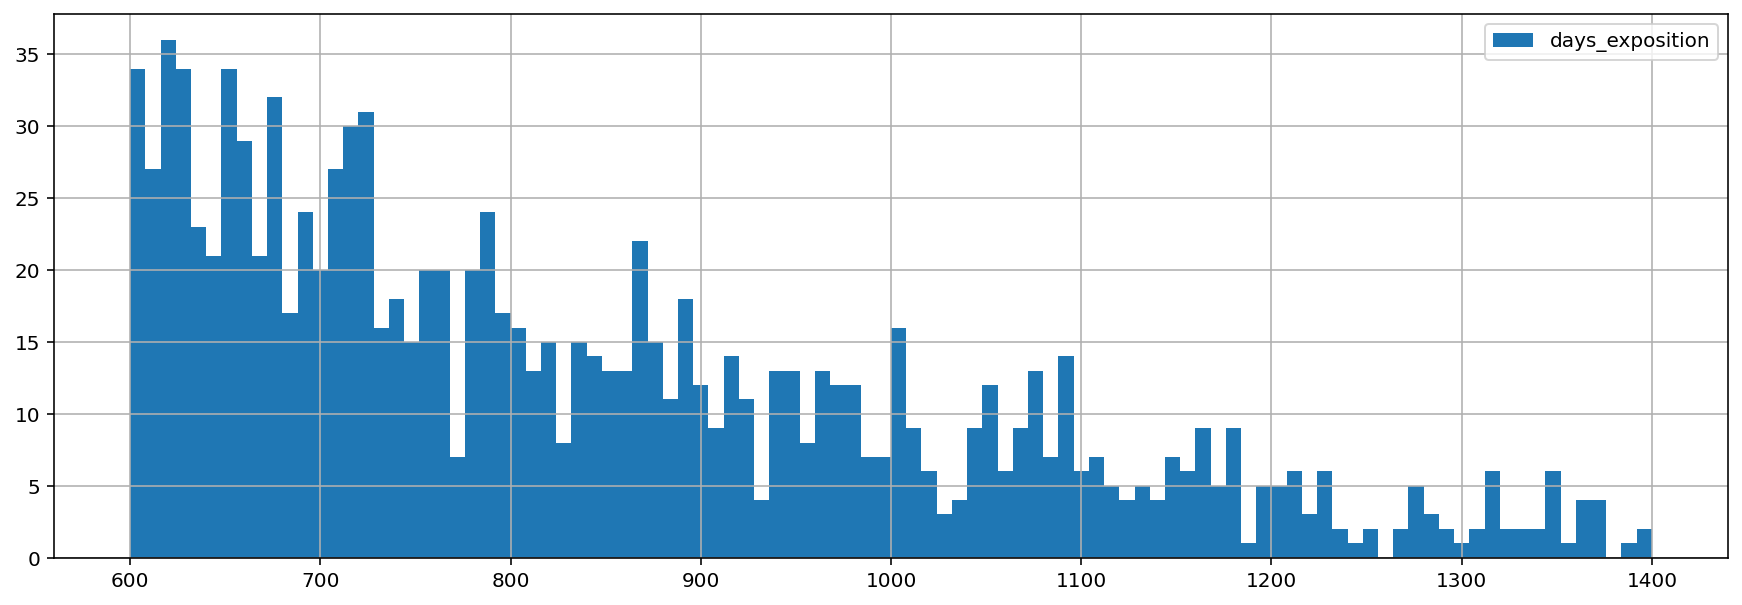

In [39]:
# Смотрим какие значения являются редкими и аномальными, для этого с помощью 
# параметра range ограничим интересующие нас значения в правой части графика:
data['days_exposition'].hist(bins = 100, figsize = (15,5), range=(600,1400), legend=True);

На основании полученных данных будем считать редкостью или аномалией, мешающей решению нашей задачи, количество дней, которые объявление было размещено, более 900. Удалим все значения выше 900 дней.

In [40]:
# Методом логической индексации отфильтруем значения в столбце'days_exposition', 
# учитывая, что в столбце есть пропуски, которые не нужно удалять:

data = data.loc[(data['days_exposition'] <= 900) | (data['days_exposition'].isna())]

In [41]:
# Проверим, сколько осталось строк в датафрейме:
len(data)

22927

Удалим редкие и выбивающиеся значения из столбца с жилой площадью. 

In [42]:
# Смотрим  количество уникальных значений столбце 'living_area', результат 
# преобразуем в датарфрейм методом to_frame():

data['living_area'].value_counts().to_frame()

,living_area
18.000000,874
17.000000,667
30.000000,588
20.000000,473
16.000000,469
...,...
29.599998,1
49.250000,1
125.100000,1
33.470000,1


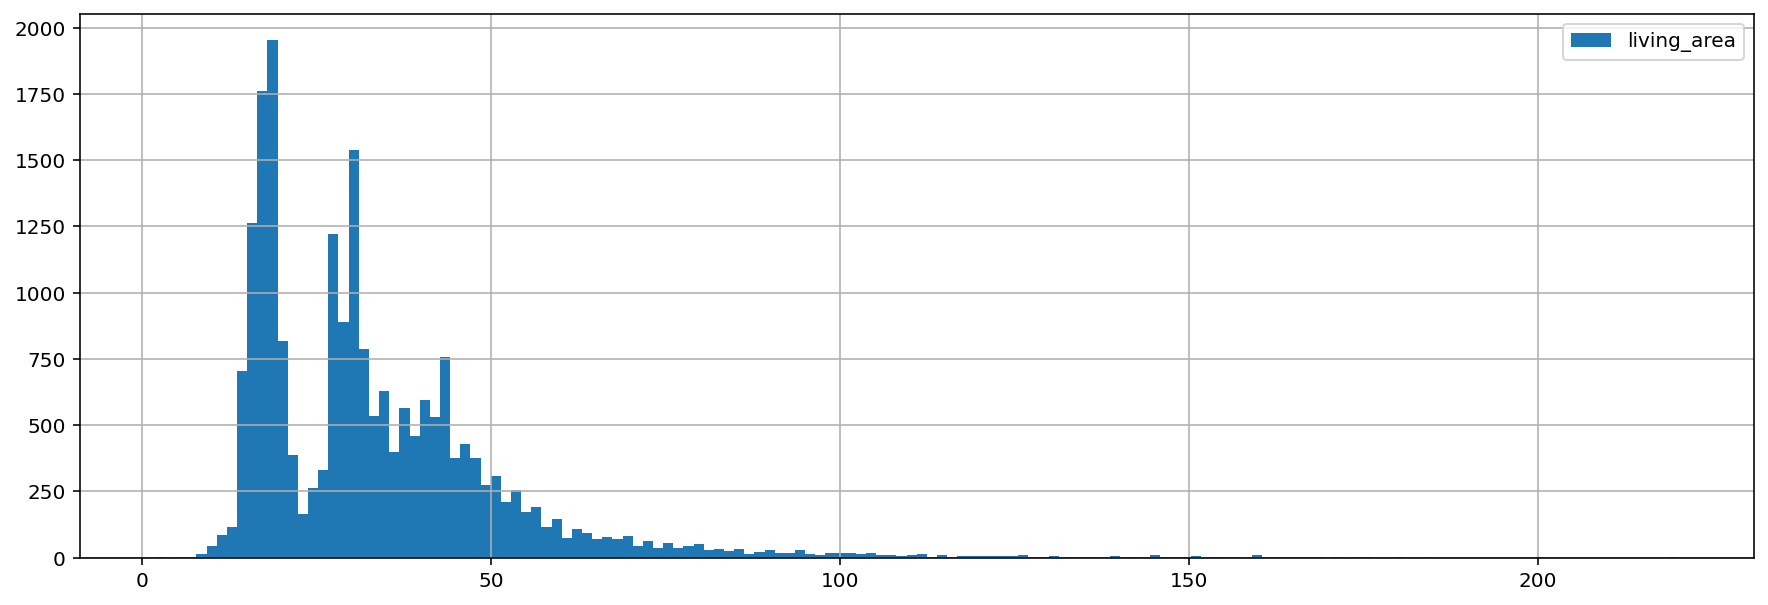

In [43]:
# Строим гистрограмму для столбца 'living_area' методом hist():
data['living_area'].hist(bins = 150, figsize = (15,5), legend=True);

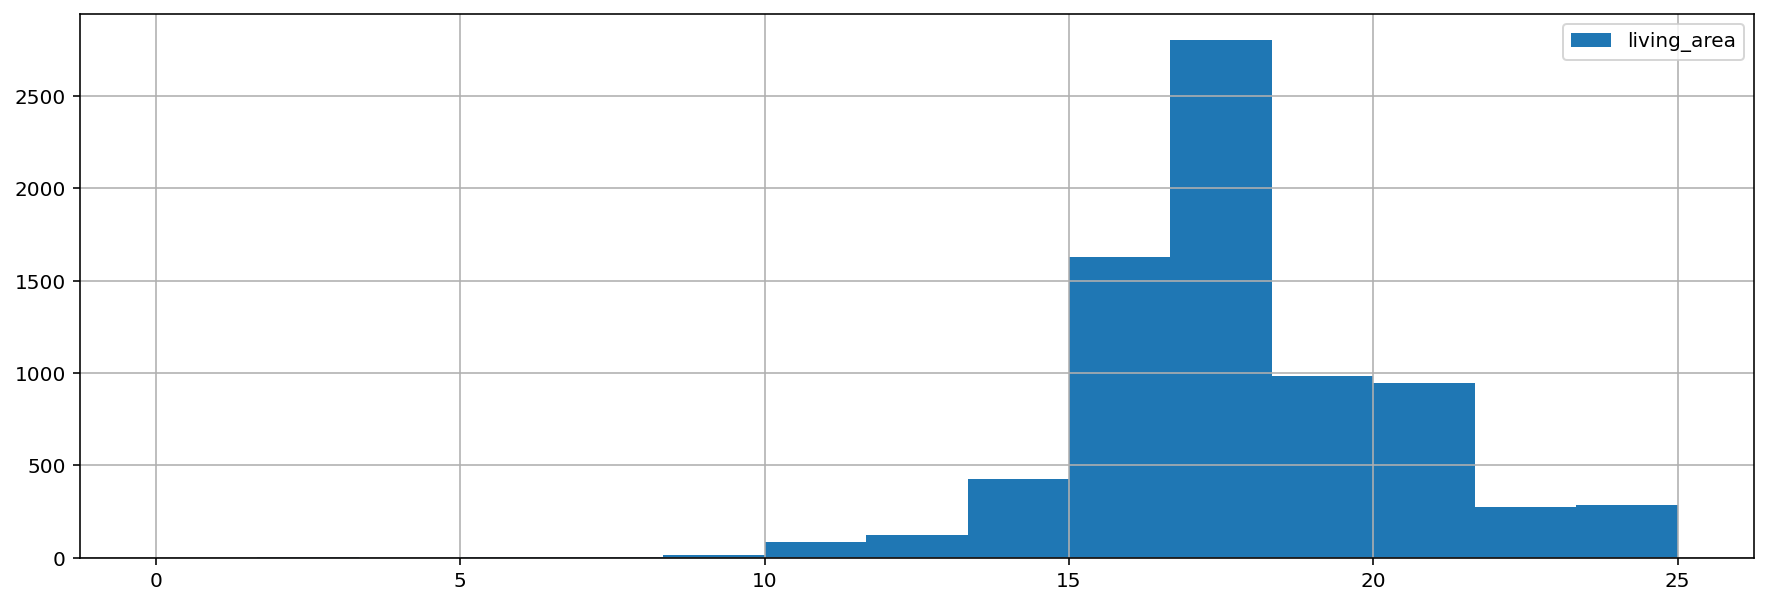

In [44]:
# Смотрим какие значения являются редкими и аномальными, для этого с помощью 
# параметра range ограничим интересующие нас значения в левой части графика:
data['living_area'].hist(bins = 15, figsize = (15,5), range=(0,25), legend=True);

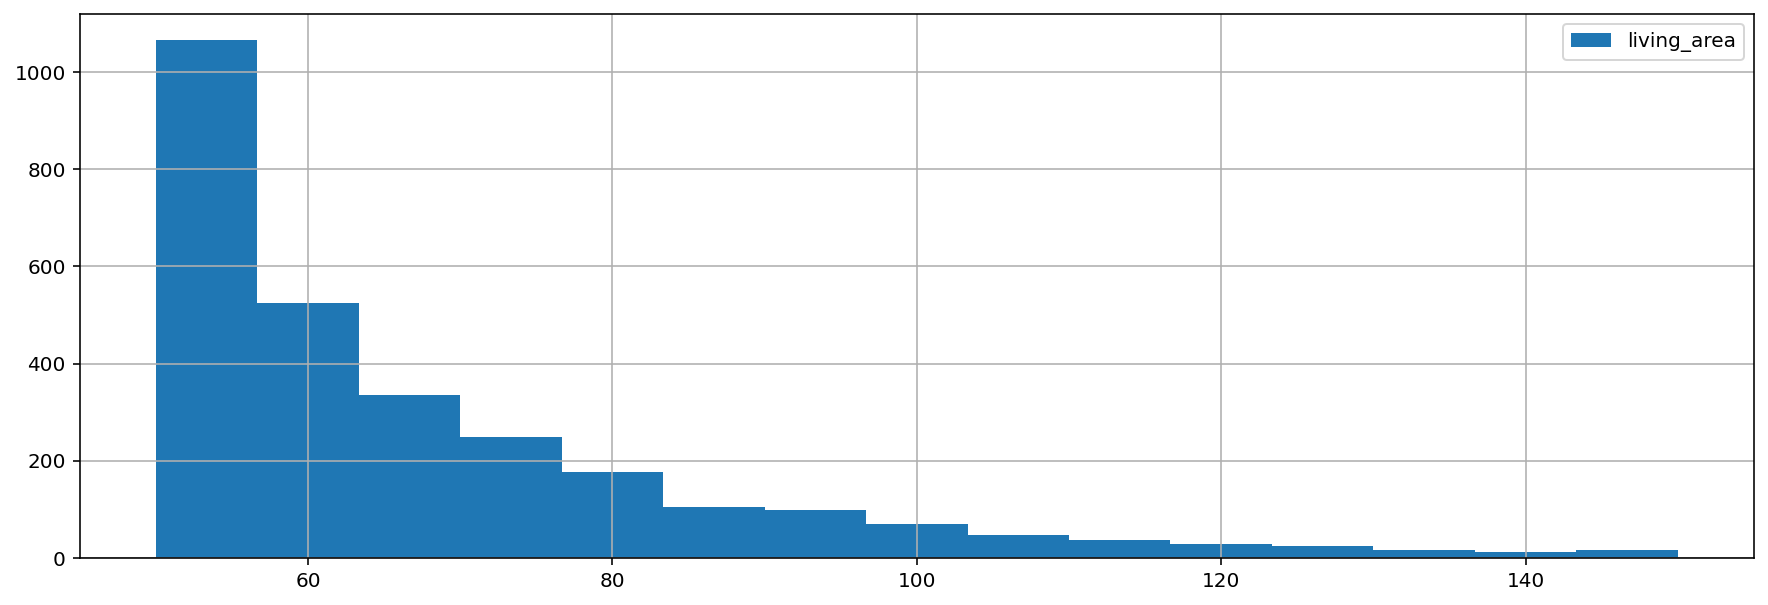

In [45]:
# Смотрим какие значения являются редкими и аномальными, для этого с помощью 
# параметра range ограничим интересующие нас значения в правой части графика:
data['living_area'].hist(bins = 15, figsize = (15,5), range=(50,150), legend=True);

На основании полученных данных будем считать жилую площадь квартиры менее 10-ти и более 120-ти квадратных метров редкостью или аномалией, мешающей решению нашей задачи. Удалим все значения вне этого диапазона.

In [46]:
# Методом логической индексации отфильтруем значения в столбце'days_exposition', 
# учитывая, что в столбце есть пропуски, которые не нужно удалять:

data = data.loc[(data['living_area'] >= 10) & (data['living_area'] <= 120) | (data['living_area'].isna())]

In [47]:
# Проверим, сколько осталось строк в датафрейме:
len(data)

22783

Удалим редкие и выбивающиеся значения из столбца площадью кухни. 

In [48]:
# Смотрим  количество уникальных значений столбце 'living_area', результат 
# преобразуем в датарфрейм методом to_frame():

data['kitchen_area'].value_counts().to_frame()

,kitchen_area
6.00,1275
10.00,1236
8.00,1097
9.00,1073
7.00,1045
...,...
50.20,1
28.80,1
7.03,1
6.84,1


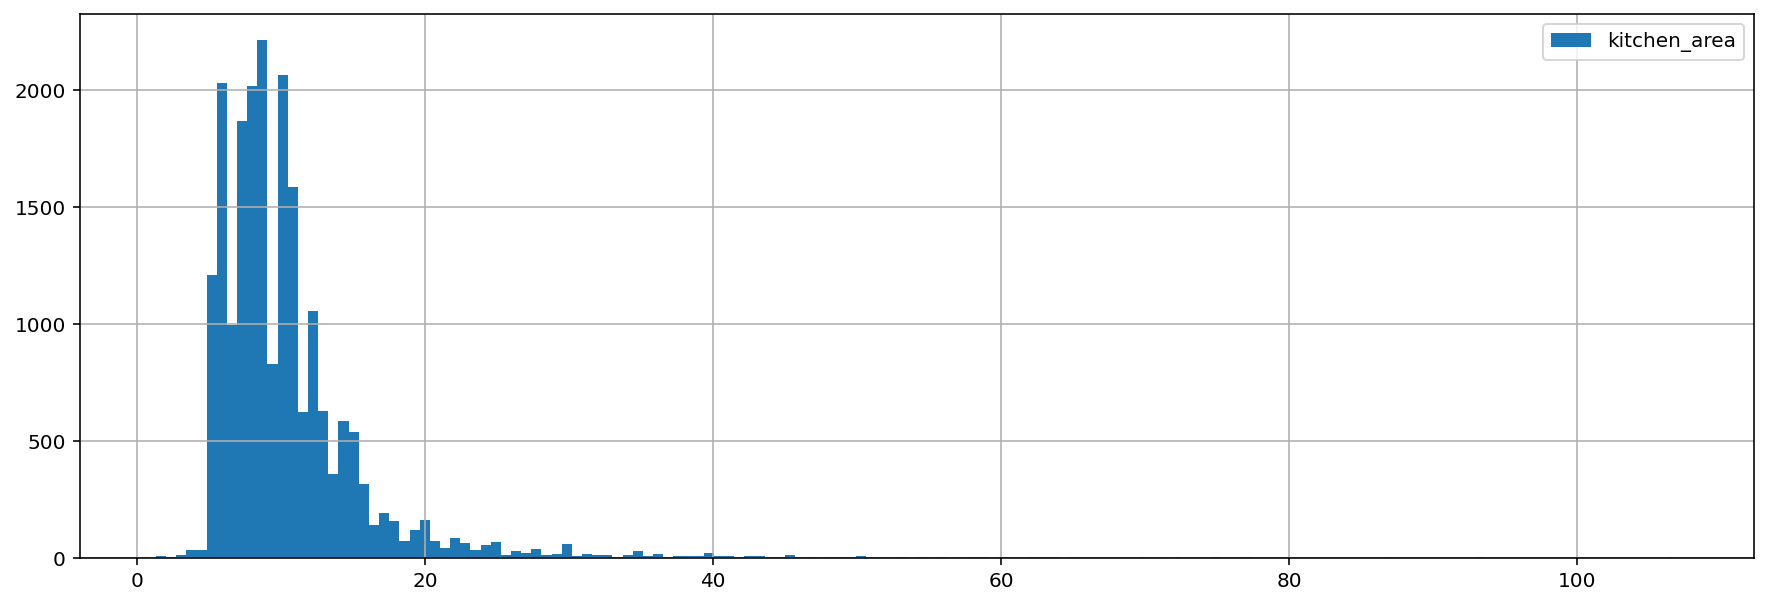

In [49]:
# Строим гистрограмму для столбца 'living_area' методом hist():
data['kitchen_area'].hist(bins = 150, figsize = (15,5), legend=True);

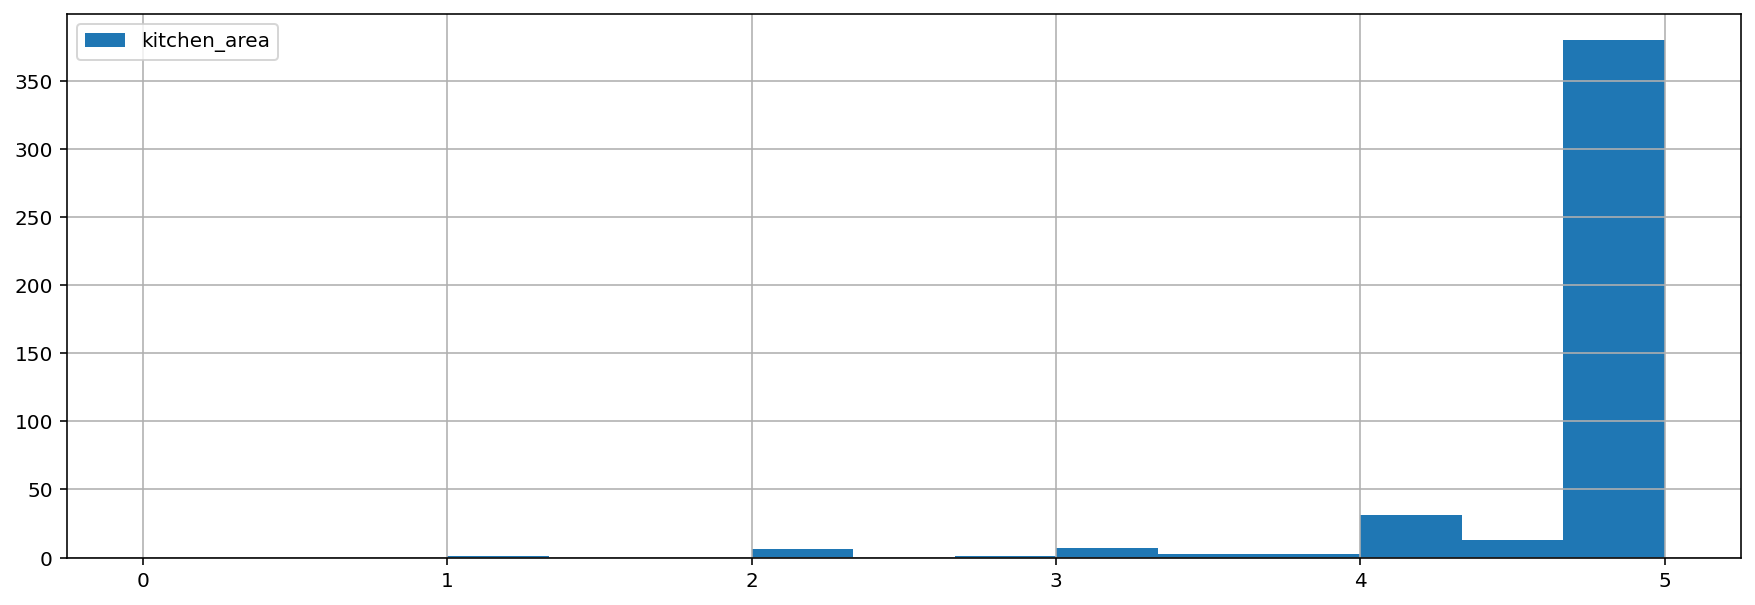

In [50]:
# Смотрим какие значения являются редкими и аномальными, для этого с помощью 
# параметра range ограничим интересующие нас значения в левой части графика:
data['kitchen_area'].hist(bins = 15, figsize = (15,5), range=(0,5), legend=True);

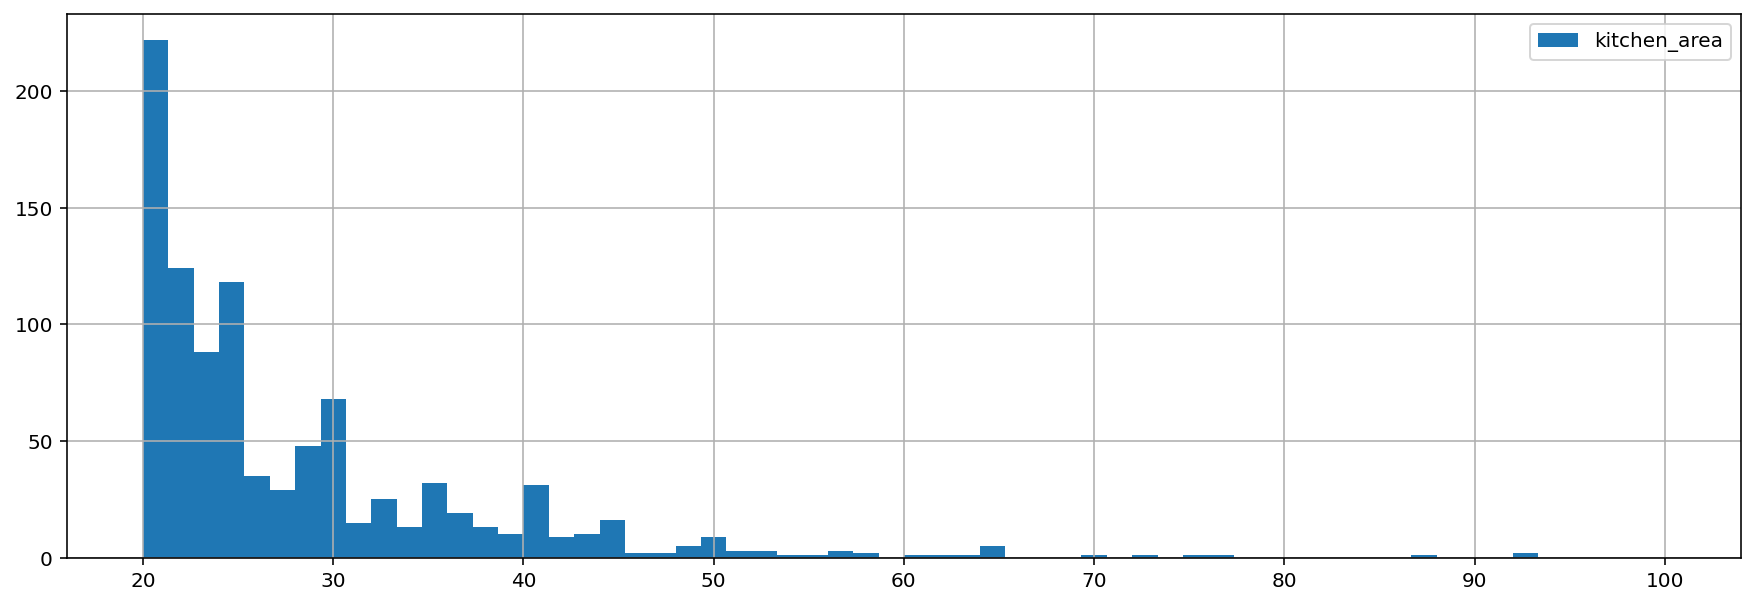

In [51]:
# Смотрим какие значения являются редкими и аномальными, для этого с помощью 
# параметра range ограничим интересующие нас значения в правой части графика:
data['kitchen_area'].hist(bins = 60, figsize = (15,5), range=(20,100), legend=True);

На основании полученных данных будем считать площадь кухни менее 4-х и более 45-ти квадратных метров редкостью или аномалией, мешающей решению нашей задачи. Удалим все значения вне этого диапазона.

In [52]:
# Методом логической индексации отфильтруем значения в столбце'kitchen_area', 
# учитывая, что в столбце есть пропуски, которые не нужно удалять:

data = data.loc[(data['kitchen_area'] >= 4) & (data['kitchen_area'] <= 45) | (data['kitchen_area'].isna())]

In [53]:
# Проверим, сколько осталось строк в датафрейме:
len(data)

22715

Удалим редкие и выбивающиеся значения из столбца с количеством комнат в квартире.

In [54]:
# Смотрим  количество уникальных значений столбце 'living_area', результат 
# преобразуем в датарфрейм методом to_frame():

data['rooms'].value_counts().to_frame()

,rooms
1,7820
2,7714
3,5605
4,1097
5,242
0,173
6,47
7,14
8,2
9,1


Для нашего исследования  квартиры с числом комнат более 7 - это редкие выбивающиеся из общей картины уникальные объекты, по которым необходимо проводить отдельную работу, поэтому удалим квартиры с числом комнат менее 7.

In [55]:
# Методом логической индексации отфильтруем значения в столбце'kitchen_area', 
# учитывая, что в столбце нет пропусков:

data = data.loc[data['rooms'] <= 7 ]

In [56]:
# Проверим, сколько осталось строк в датафрейме:
len(data)

22712

In [57]:
# Посмотрим ,как изменился датафрейм:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22712 entries, 0 to 23612
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   index                 22712 non-null  int64         
 1   total_images          22712 non-null  int64         
 2   last_price            22712 non-null  float64       
 3   total_area            22712 non-null  float64       
 4   first_day_exposition  22712 non-null  datetime64[ns]
 5   rooms                 22712 non-null  int64         
 6   ceiling_height        13862 non-null  float64       
 7   floors_total          22712 non-null  int64         
 8   living_area           20915 non-null  float64       
 9   floor                 22712 non-null  int64         
 10  is_apartment          22712 non-null  bool          
 11  studio                22712 non-null  bool          
 12  open_plan             22712 non-null  bool          
 13  kitchen_area    

Таким образом, в результате удаления пропущенных, редких и аномальных значений,  мы избавились от 4,2 % выбросов (относительно исходных данных), определенных с помощью числового описания данных методом describe(), методом value_counts() и гистограмм, построенных методом hist().

## Посчитайте и добавьте в таблицу новые столбцы

### Добавим в таблицу новый столбец с ценой одного квадратного метра.

In [67]:
# Добавляем новый столбец price_1_m в датафрейм:
data['price_1_m'] = data['last_price'] / data['total_area']

### Добавим в таблицу новый столбец с днем недели публикации объявления (0 — понедельник, 1 — вторник и так далее).

In [68]:
# Добавляем новый столбец weekday в датафрейм:
data['weekday'] = data['first_day_exposition'].dt.weekday

### Добавим в таблицу новый столбец с месяцем публикации  объявления (1 — январь,  2 — февраль и так далее).

In [69]:
# Добавляем новый столбец month в датафрейм:
data['month'] = data['first_day_exposition'].dt.month
data['month']

0         3
1        12
2         8
3         7
4         6
         ..
23608     3
23609     1
23610     2
23611     3
23612     7
Name: month, Length: 22712, dtype: int64

### Добавим в таблицу новый столбец с годом публикации  объявления.

In [70]:
# Добавляем новый столбец year в датафрейм:
data['year'] = data['first_day_exposition'].dt.year
data['year']

0        2019
1        2018
2        2015
3        2015
4        2018
         ... 
23608    2017
23609    2018
23610    2018
23611    2017
23612    2017
Name: year, Length: 22712, dtype: int64

### Добавим в таблицу новый столбец с типом этажа квартиры (значения — «первый», «последний», «другой»).

In [71]:
# Создадим функцию categorize_floor, которую будем применять ко всему датафрейму:
def categorize_floor(dt):
    # Введем переменные, которым присвоим значения столобцов датафрейма:
    floor = dt['floor']
    floors_total = dt['floors_total']
    #Создадим условие для распределения значений столбца floor на категории:
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    else:
        return 'другой'
# В датафрейм добавим новый столбец floor_category, полученный применением функции 
# categorize_purpose методом apply() ко всему датафрейму, установим параметр axis=1, 
# чтобы в функцию передавались строки, а не столбцы:
data['floor_category'] = data.apply(categorize_floor, axis=1)
# Проверим, что получилось:
data['floor_category'].value_counts()

другой       16761
последний     3154
первый        2797
Name: floor_category, dtype: int64

### Добавим в таблицу новый столбец с расстоянием до центра города в километрах.

In [72]:
# Добавляем новый столбец centre_dist в датафрейм, значения в котором будут в км:
data['centre_dist'] = data['cityCenters_nearest'] / 1000
# Округляем значения в столбце centre_dist до целых значений: 
data['centre_dist'] = data['centre_dist'].round()

In [73]:
# Проверяем обновленный датафрейм, выводим первые 10 строк методом head():
data.head(10)

,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_1_m,weekday,month,year,floor_category,centre_dist
0,0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.00,8,...,482.0,2.0,755.0,NaN,120370.370370,3,3,2019,другой,16.0
1,1,7,3350000.0,40.40,2018-12-04,1,NaN,11,18.60,1,...,NaN,0.0,NaN,81.0,82920.792079,1,12,2018,первый,19.0
2,2,10,5196000.0,56.00,2015-08-20,2,NaN,5,34.30,4,...,90.0,2.0,574.0,558.0,92785.714286,3,8,2015,другой,14.0
3,3,0,64900000.0,159.00,2015-07-24,3,NaN,14,NaN,9,...,84.0,3.0,234.0,424.0,408176.100629,4,7,2015,другой,7.0
4,4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.00,13,...,112.0,1.0,48.0,121.0,100000.000000,1,6,2018,другой,8.0
5,5,10,2890000.0,30.40,2018-09-10,1,NaN,12,14.40,5,...,NaN,NaN,NaN,55.0,95065.789474,0,9,2018,другой,NaN
6,6,6,3700000.0,37.30,2017-11-02,1,NaN,26,10.60,6,...,NaN,0.0,NaN,155.0,99195.710456,3,11,2017,другой,19.0
7,7,5,7915000.0,71.60,2019-04-18,2,NaN,24,NaN,22,...,NaN,0.0,NaN,NaN,110544.692737,3,4,2019,другой,12.0
8,8,20,2900000.0,33.16,2018-05-23,1,NaN,27,15.43,26,...,NaN,NaN,NaN,189.0,87454.764777,2,5,2018,другой,NaN
9,9,18,5400000.0,61.00,2017-02-26,3,2.50,9,43.60,7,...,NaN,0.0,NaN,289.0,88524.590164,6,2,2017,другой,15.0


## Проведите исследовательский анализ данных

### Исследование параметров объектов:общая площадь; жилая площадь; площадь кухни; цена объекта; количество комнат; высота потолков; этаж квартиры;тип этажа квартиры; общее количество этажей в доме; расстояние до центра города в метрах; расстояние до ближайшего аэропорта; расстояние до ближайшего парка; день и месяц публикации объявления.


Построим отдельные гистограммы для каждого из этих параметров. 

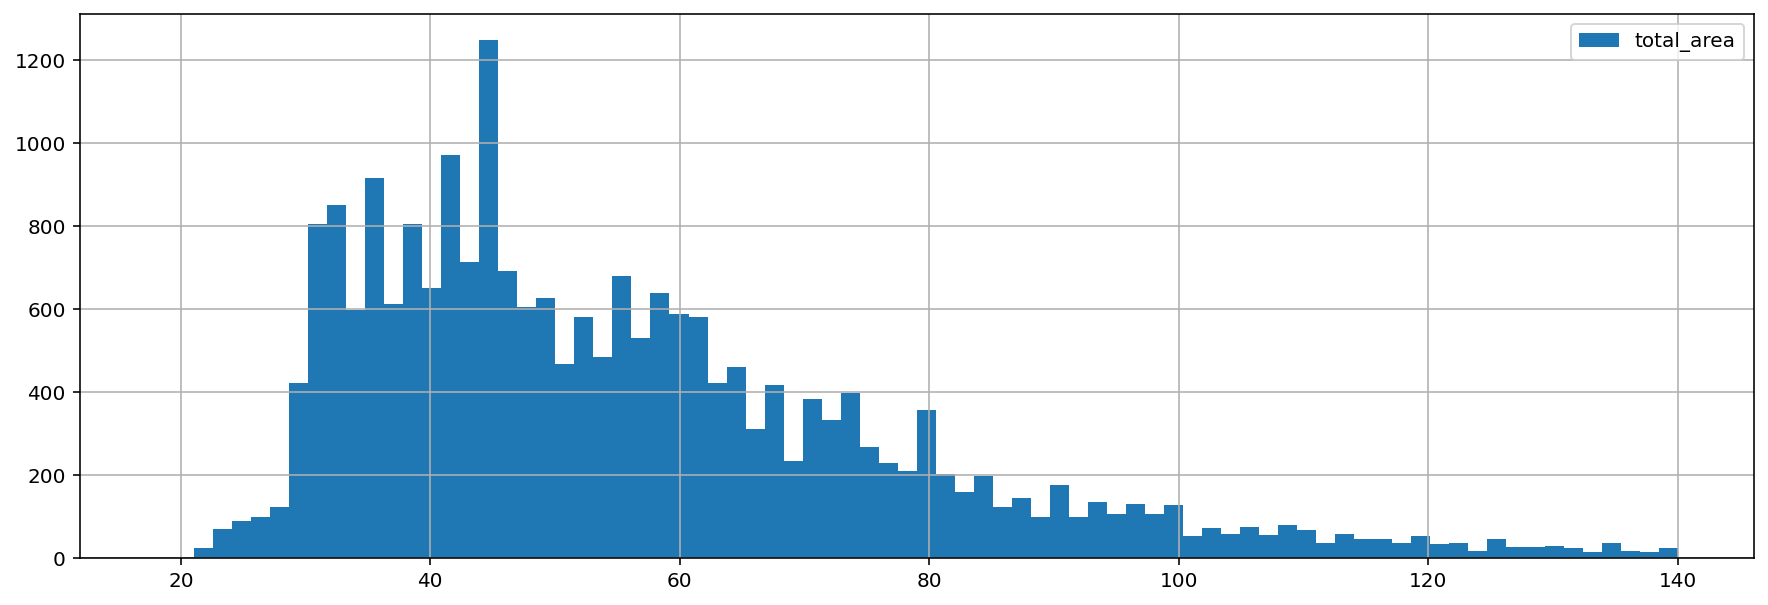

In [74]:
# Строим гистограмму для общей площади квартиры, подбирая параметры bin и range для лучшей визуализации:
data['total_area'].hist(bins=80,figsize = (15,5), range=(18,140), legend=True);


В данной выборке преобладают квартиры с общей площадью около 45 м2, несколько меньше квартир с метражом от 30 до 40 м2, ещё меньше квартир с площадью от 45 до 60 м2. В диапазоне от 60 до 140 м2 количество квартир с увеличением их общей площади уменьшается.

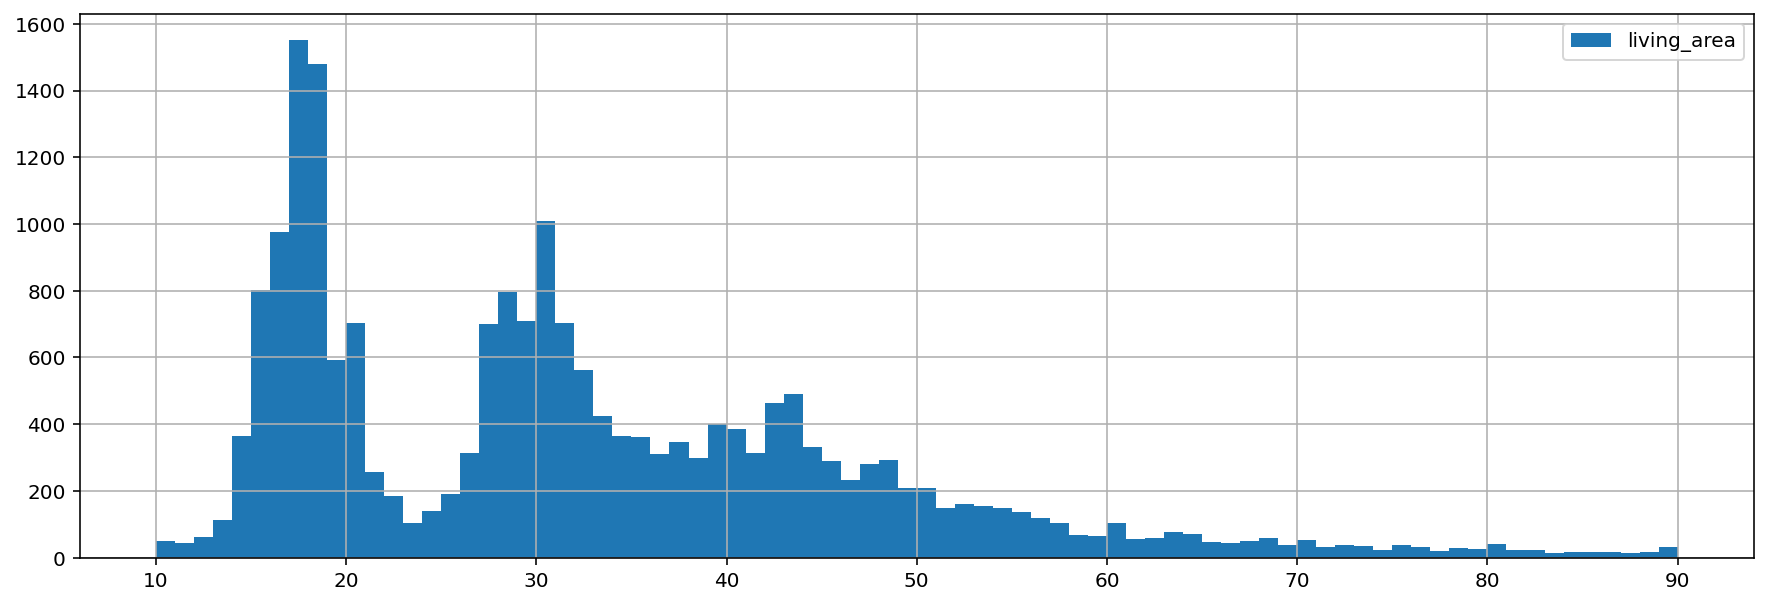

In [75]:
# Строим гистограмму для жилой площади квартиры:
data['living_area'].hist(bins=80,range= (10,90),figsize = (15,5), legend=True);

Жилая площадь квартир в большинстве случаев составляет 17 или 18 м2, чуть реже, встречаются квартиры с жилой площадью 20 м2 и в дипазоне от 27 до 32 м2. Ещё реже встречаются квартиры с жилой площадью от 35 до 45 м2.

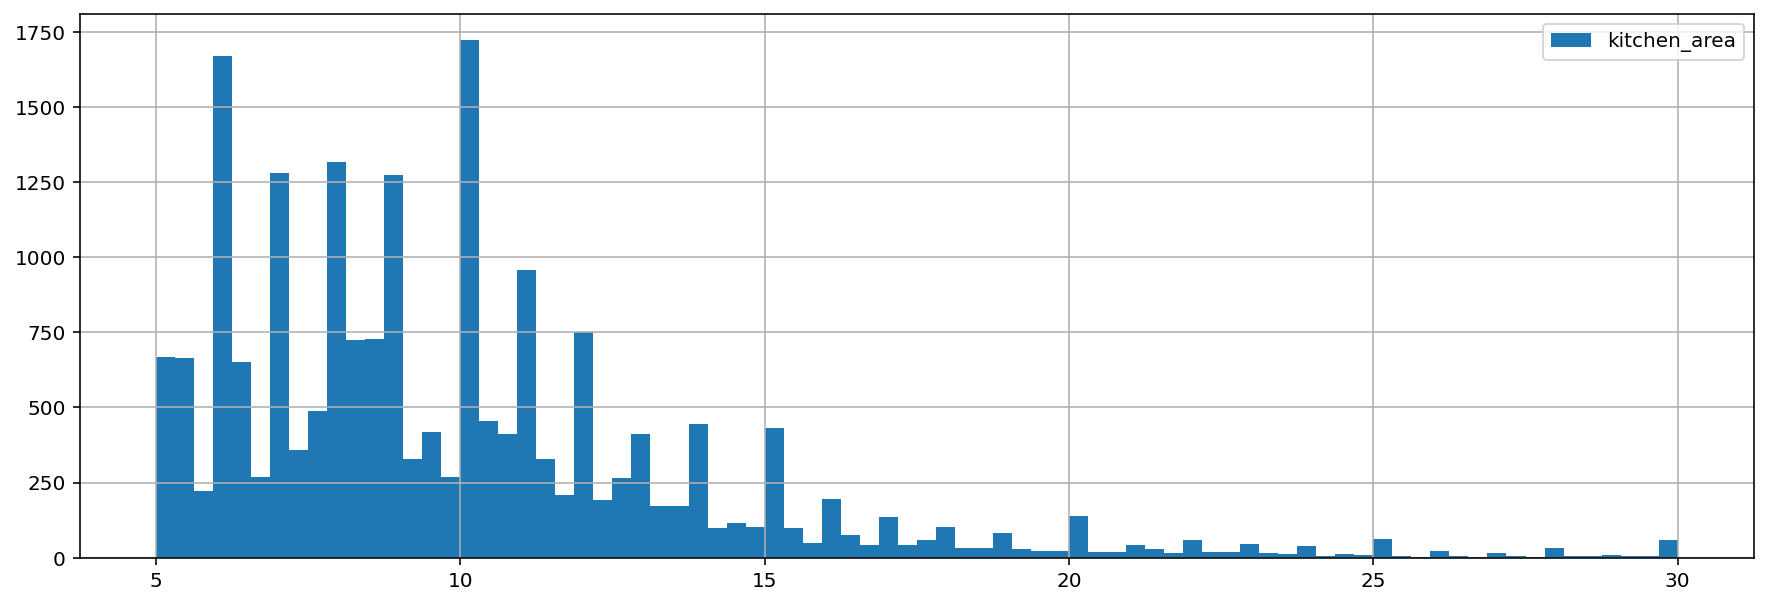

In [76]:
# Строим гистограмму для площади кухни:
data['kitchen_area'].hist(bins=80,range= (5,30), figsize = (15,5), legend=True);

Наибольшее число квартир - с площадью кухни равной около 6 и 10 м2, чуть реже встречаются кухни с площадью от 7 до 9 м2. Меньше всего квартир с площадью кухни от 20 до 30 м2.

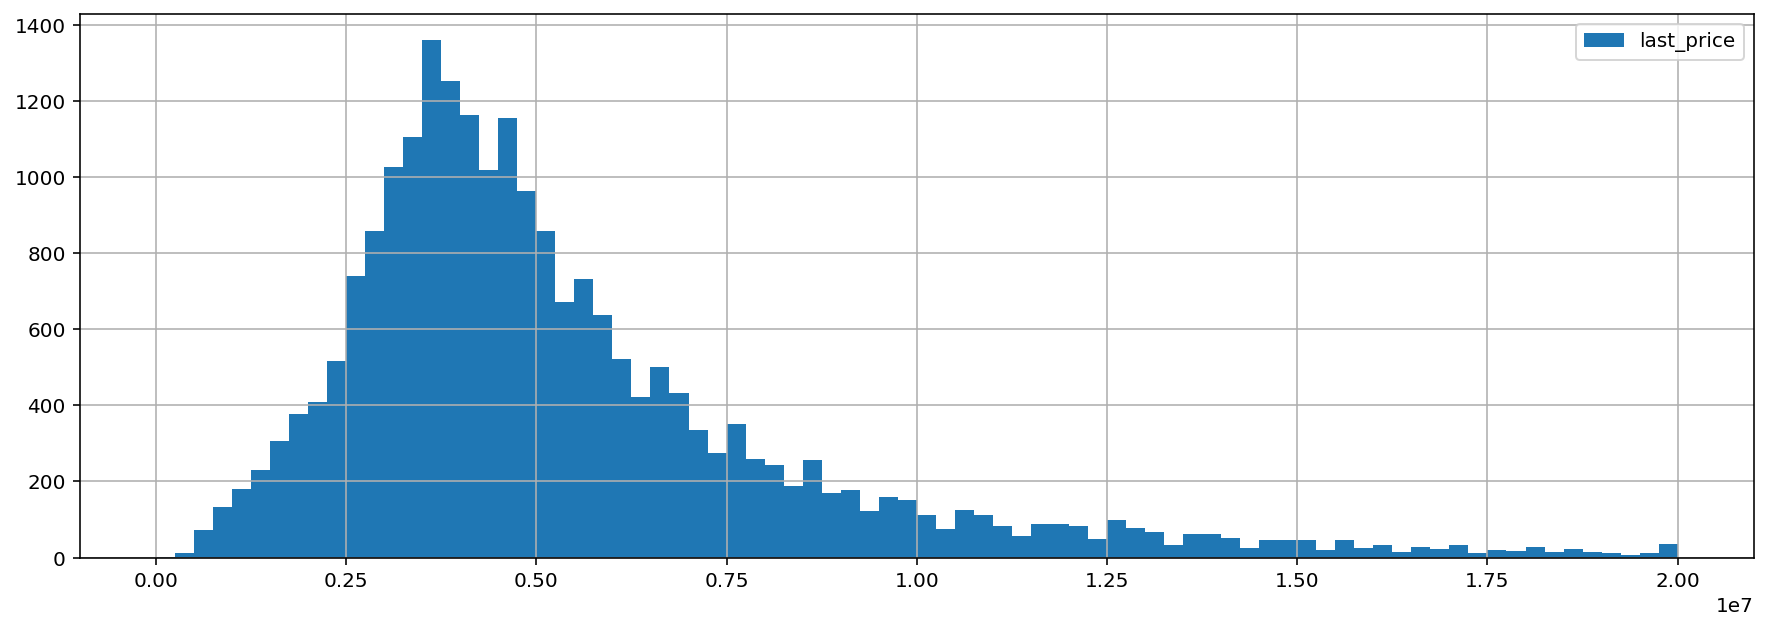

In [77]:
# Строим гистограмму для цены объекта:
data['last_price'].hist(bins=80, range= (0,2*1e7), figsize = (15,5), legend=True);

Больше всего квартир продают по цене около 2,5 до 5 млн рублей, вне данного дипазона происходит плавное снижение количества квартир с уменьшением цены ниже 2,5 млн рублей и с увеличением цены выше 5 млн рублей.  

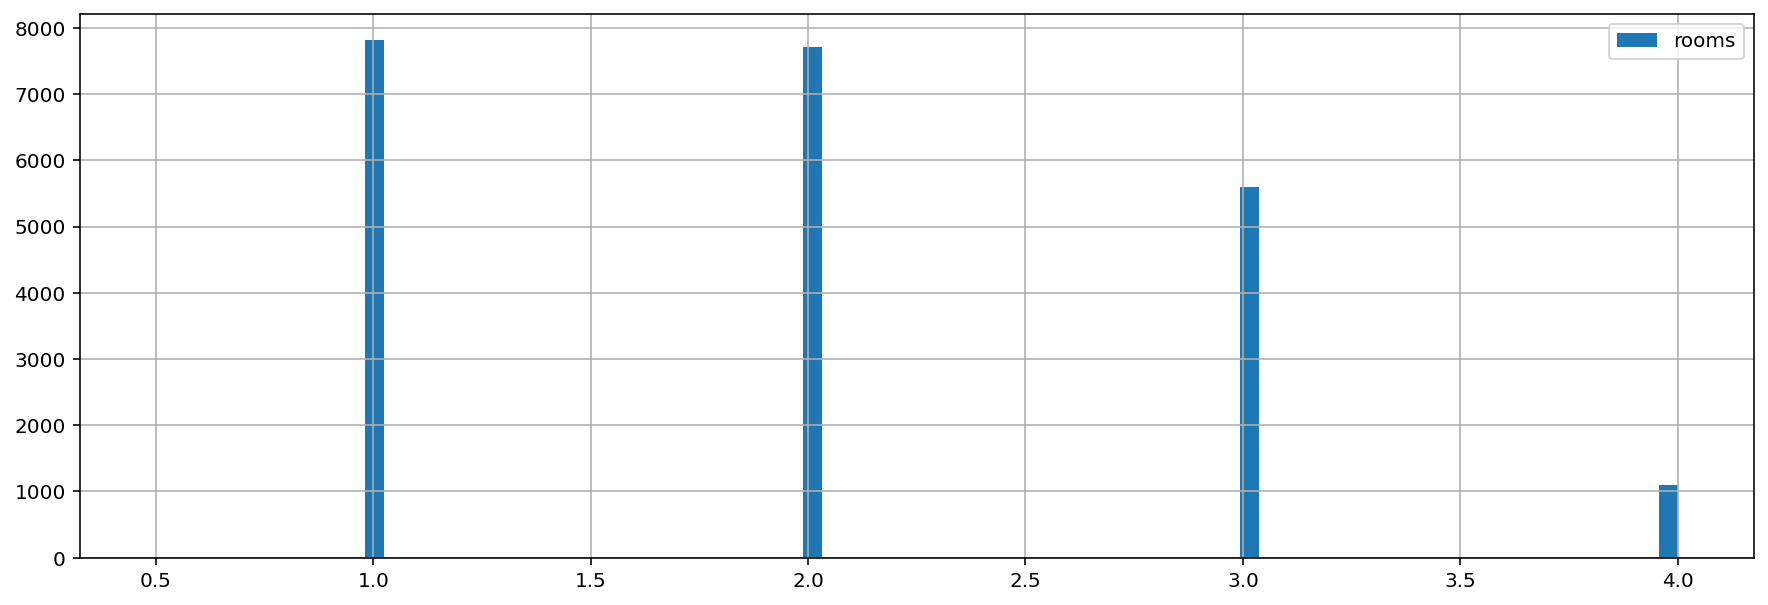

In [78]:
# Строим гистограмму для количества комнат:
data['rooms'].hist(bins=80,range=(0.5,4), figsize = (15,5), legend=True);

Наибольшее число квартир имеет 1 или 2 комнаты, по сравнению с 1 -комнатными квартирами 
 3-комнатых примерно в 1,5 раза меньше. Меньше всего 4-х комнатных квартир. 

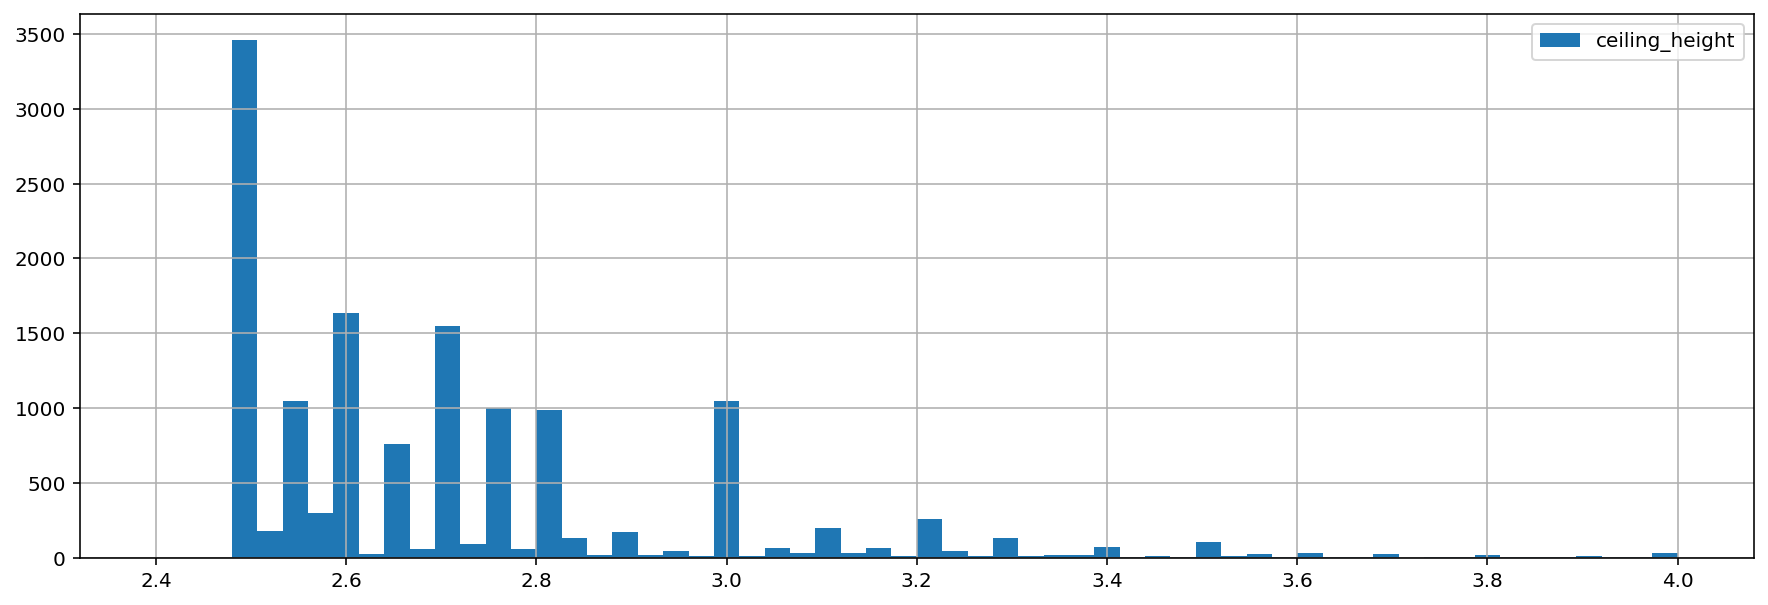

In [79]:
# Строим гистограмму для высоты потолков:
data['ceiling_height'].hist(bins=60, range= (2.4,4), figsize = (15,5), legend=True);

Больше всего квартир с 2,5-метровыми потолками. В то же время много квартир имеют потолки высотой 2,6, 2,7 м и 3 метра. 


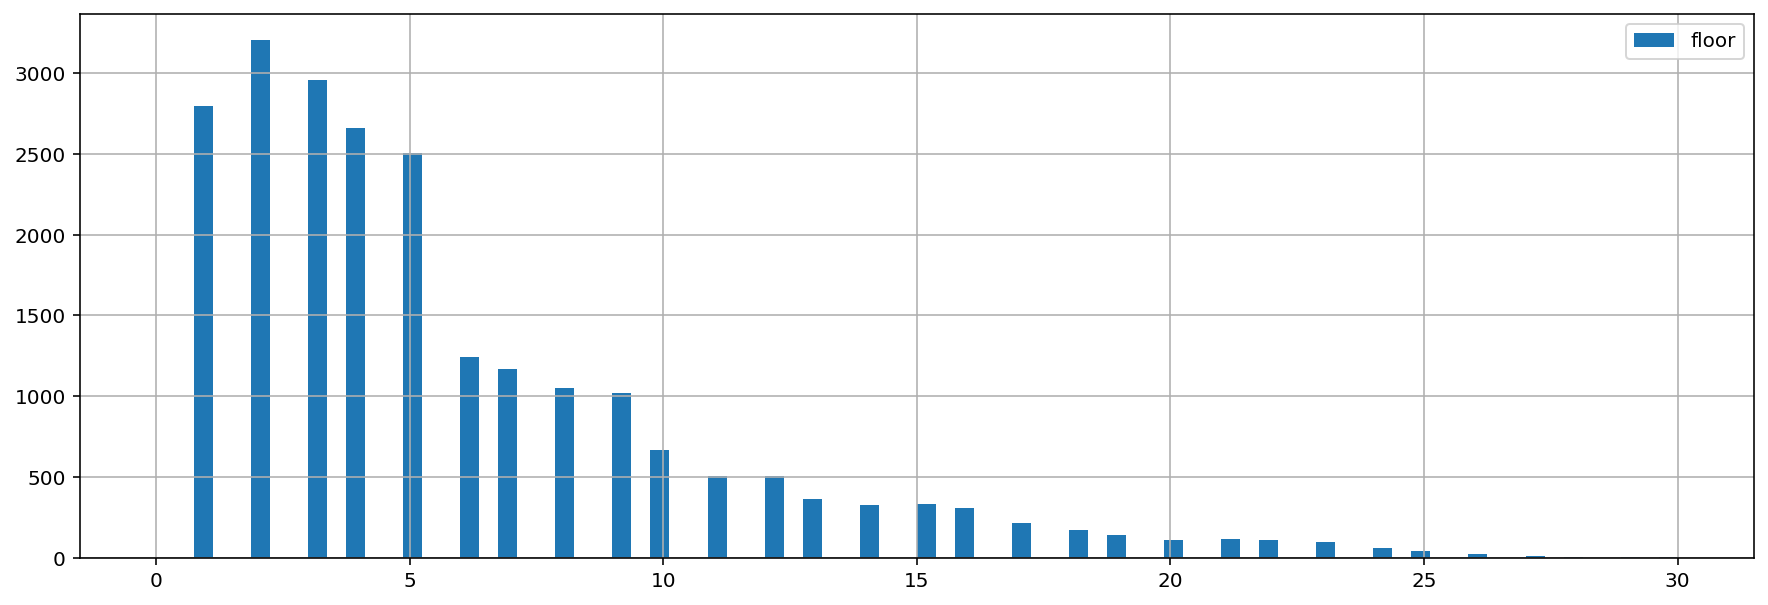

In [80]:
# Строим гистограмму для этажа, на котором расположена квартира:
data['floor'].hist(bins=80, figsize = (15,5), range= (0,30), legend=True);

Больше всего квартир расположено на этажах с 1 по 5. Квартир, распложенных на этажах выше, значительно меньше, и их число равномерно снижается с увеличением этажа.  

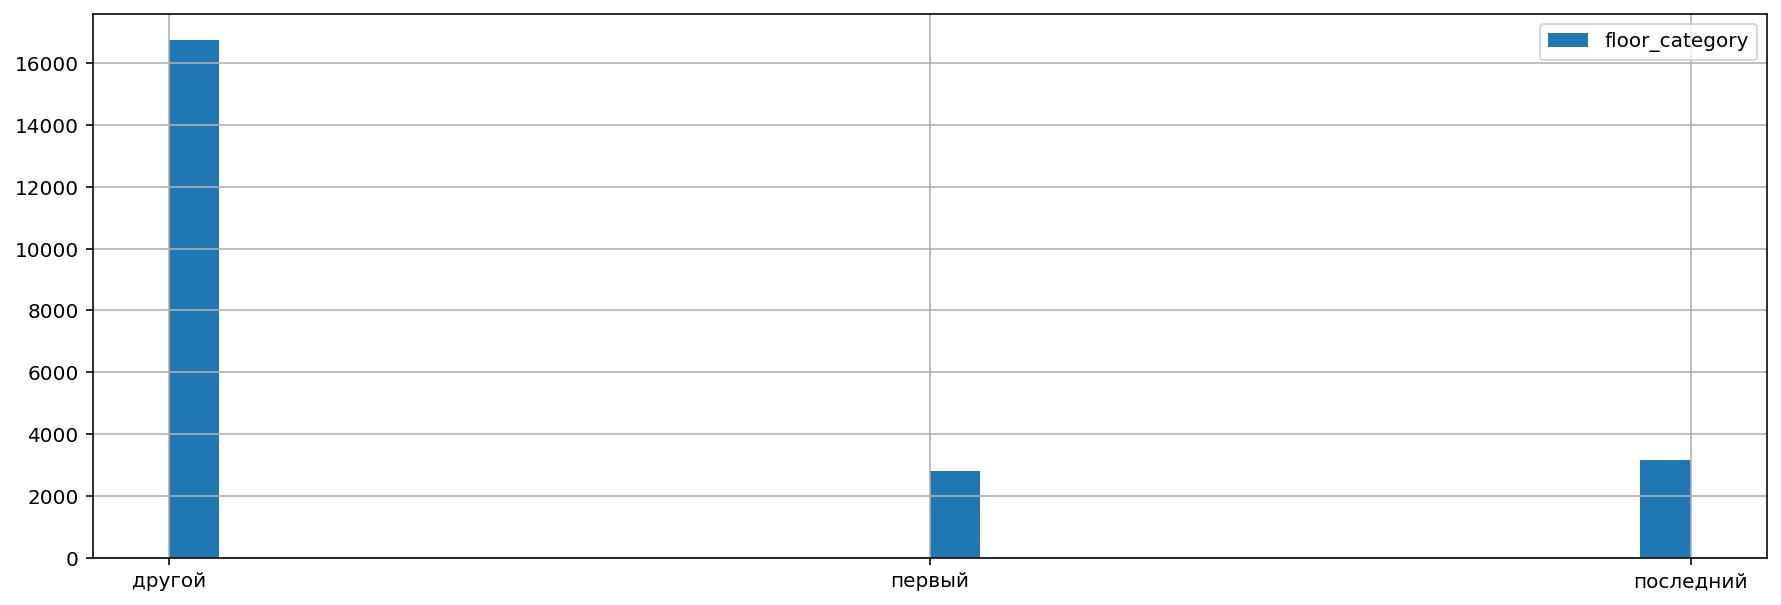

In [81]:
# Строим гистограмму для типа этажа квартиры:
data['floor_category'].hist(bins=30, figsize = (15,5), legend=True);

Число квартир на первом и последнем этажах практически равное, в то же время число других типов этажей превышает каждую из этих категорий по отдельности примерно в 5 раз.

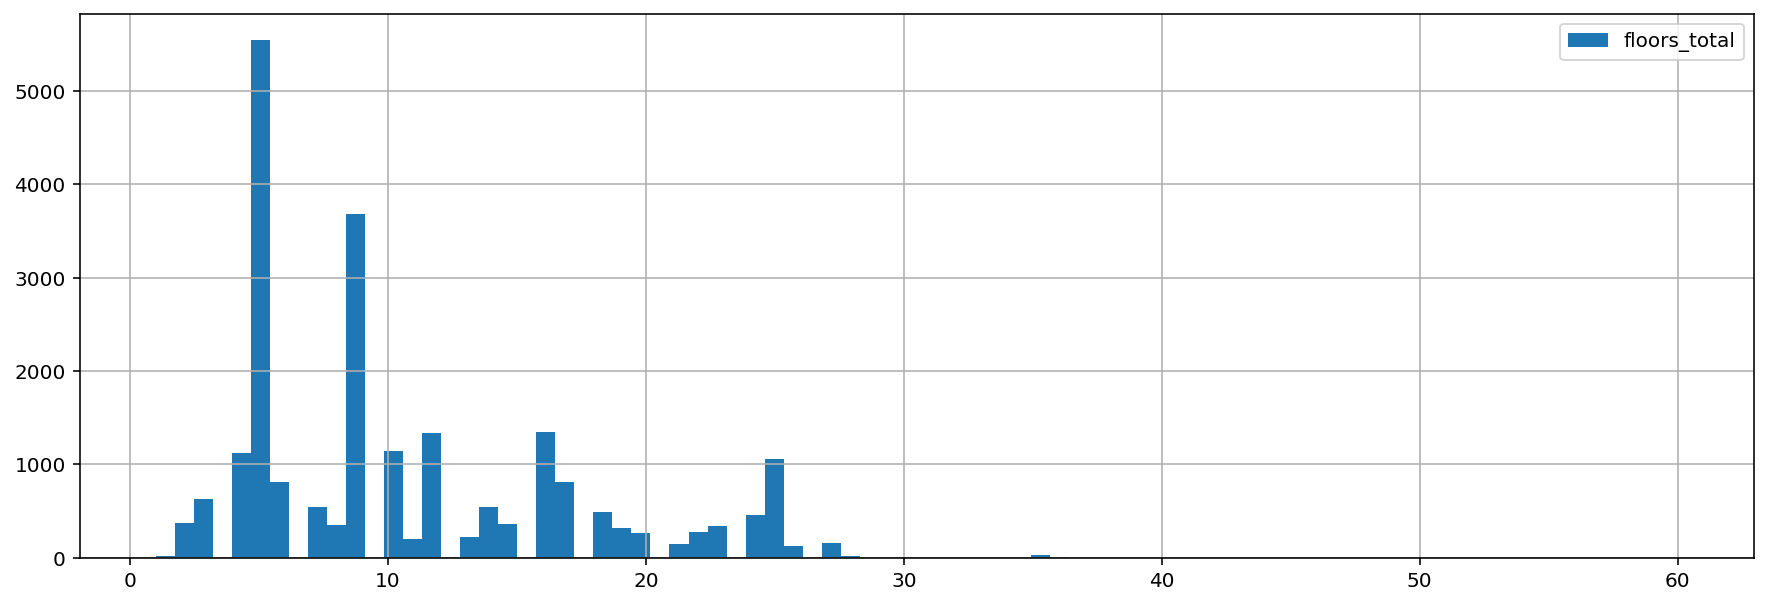

In [82]:
# Строим гистограмму для общего количества этажей в доме:
data['floors_total'].hist(bins=80, figsize = (15,5), legend=True);

Чаще других в данной выборке встречаются 5 и 9-этажные дома, при этом чуть меньше квартир продается в 9-эатжных домах.

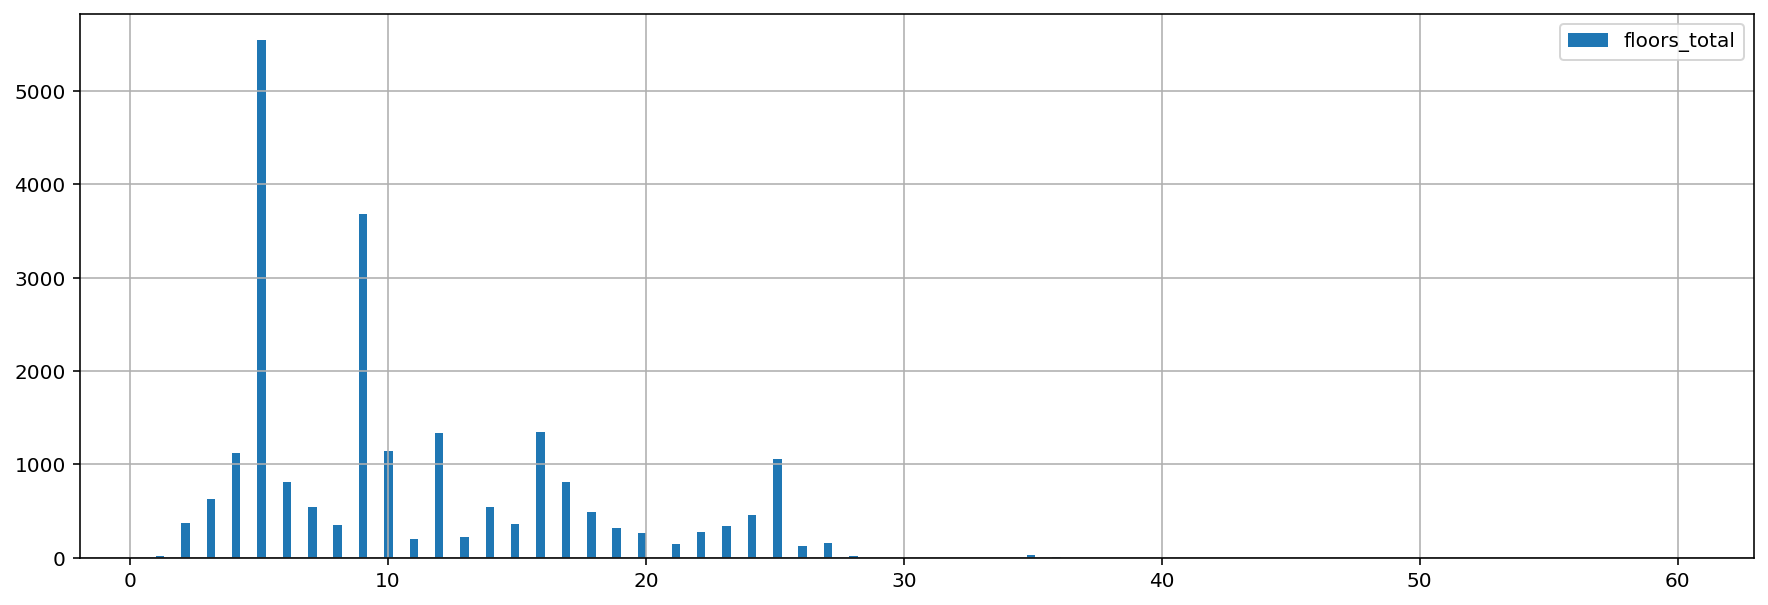

In [83]:
# Строим гистограмму для общего количества этажей в доме:
data['floors_total'].hist(bins=180, figsize = (15,5), legend=True);

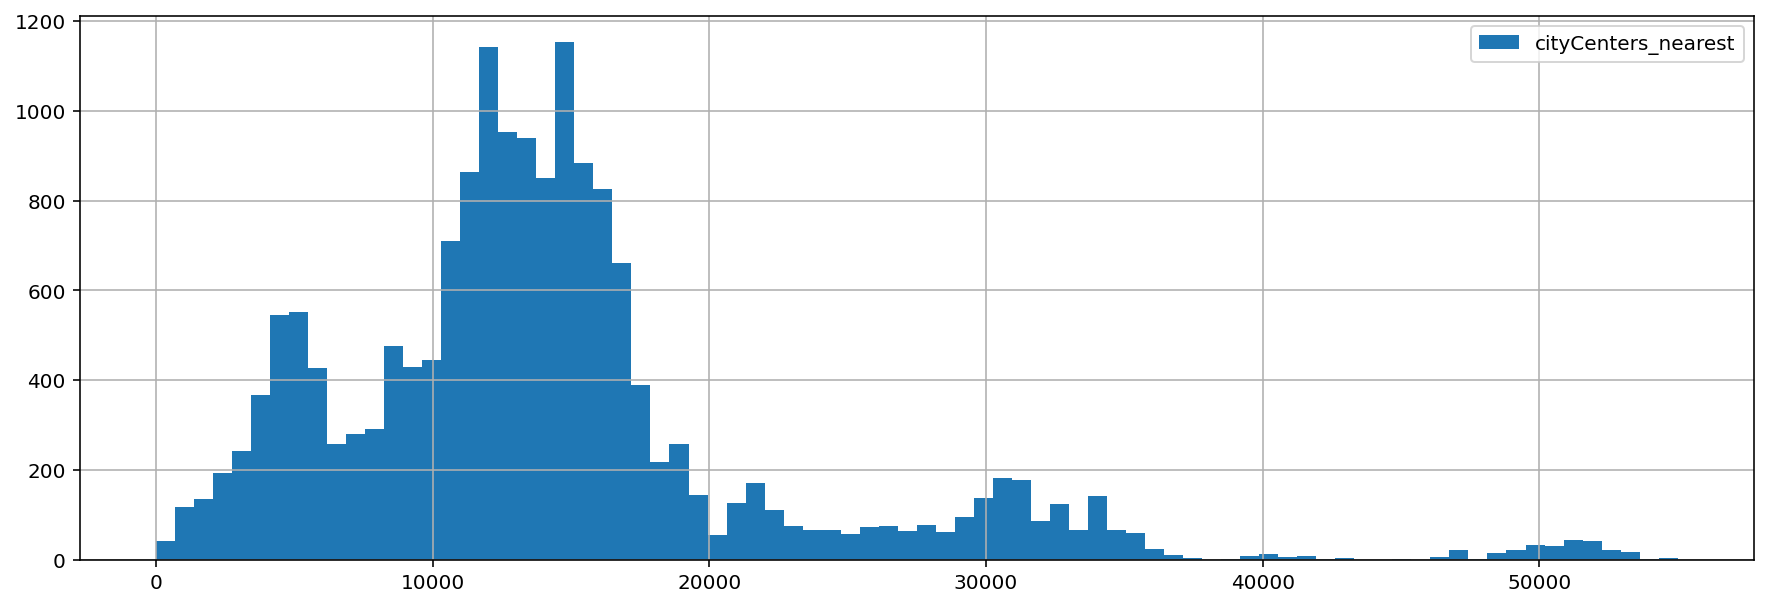

In [84]:
# Строим гистограмму для расстояния до центра города в метрах:
data['cityCenters_nearest'].hist(bins=80,range=(0,55000), figsize = (15,5), legend=True);

Как правило, больше всего квартир расположено на расстоянии 10000-17000 м от центра, также значительное число квартир расположено в 5000 м-7000 м и 9000 м от центра. 

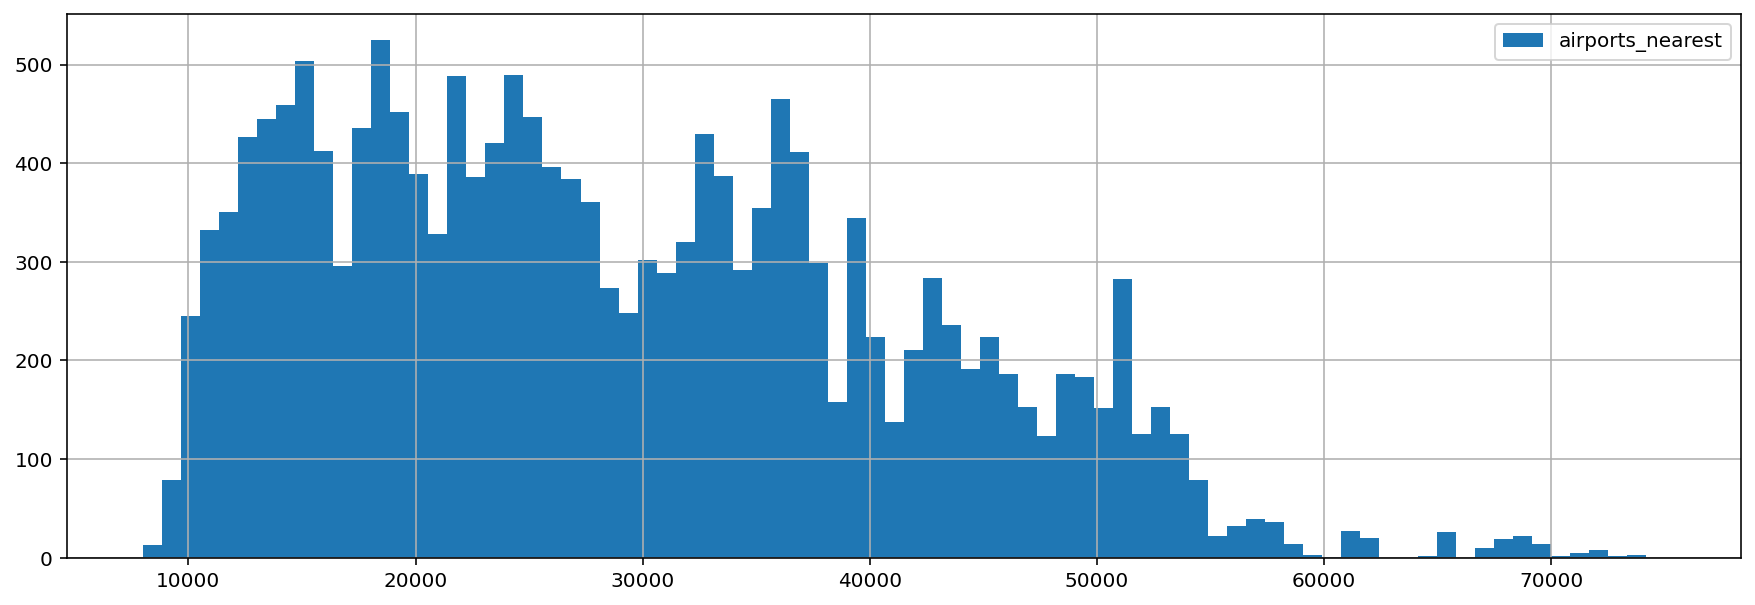

In [85]:
# Строим гистограмму для расстояния до ближайшего аэропорта:
data['airports_nearest'].hist(bins=80, range=(8000,75000), figsize = (15,5), legend=True);

Наибольшее число квартир в данной выборке расположено на расстоянии от 10 000 до 29 000 м от аэропорта.

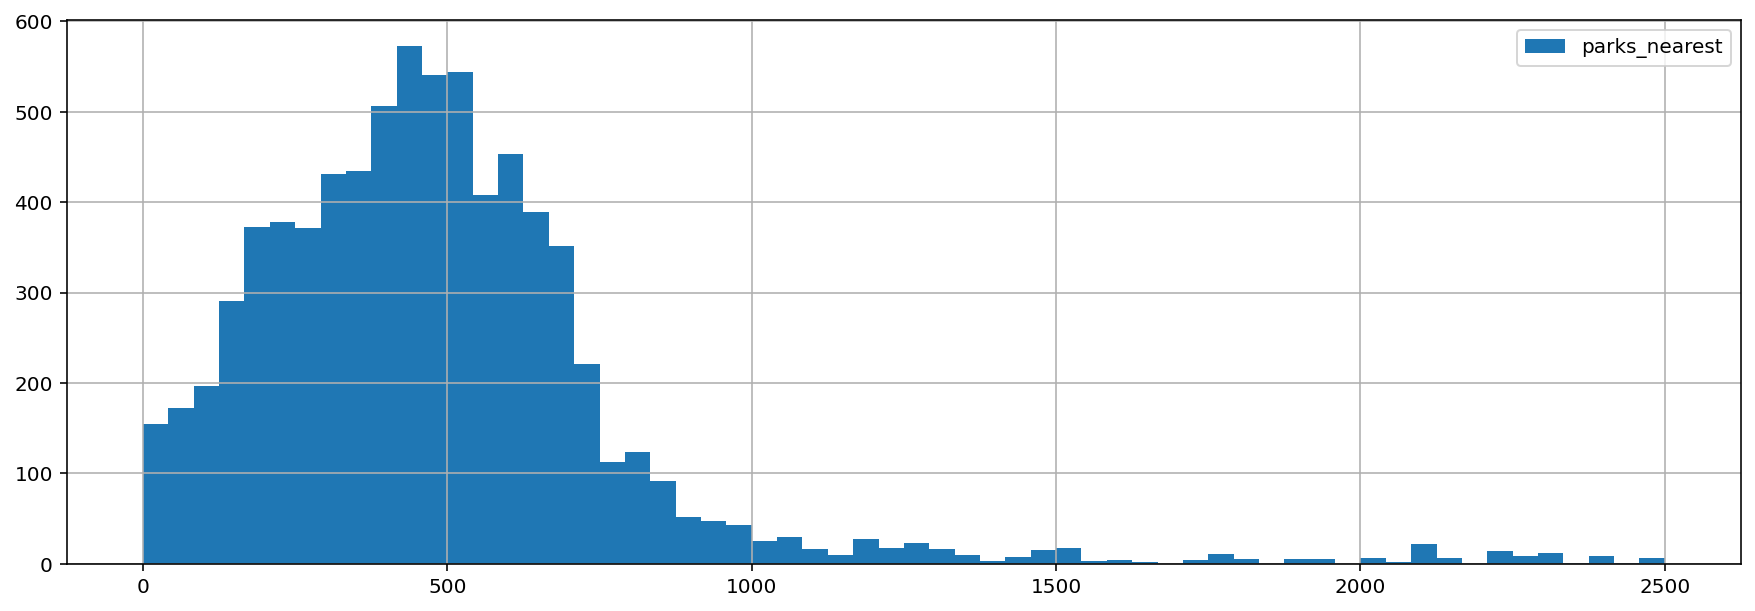

In [86]:
# Строим гистограмму для расстояния до ближайшего парка:
data['parks_nearest'].hist(bins=60, range=(0,2500), figsize = (15,5), legend=True);

Как правило, расстояние от квартиры до ближайшего парка не превышает 200-700 м, при этом в данном дипазоне преобладают квартиры с парками в доступности 400-500 м.

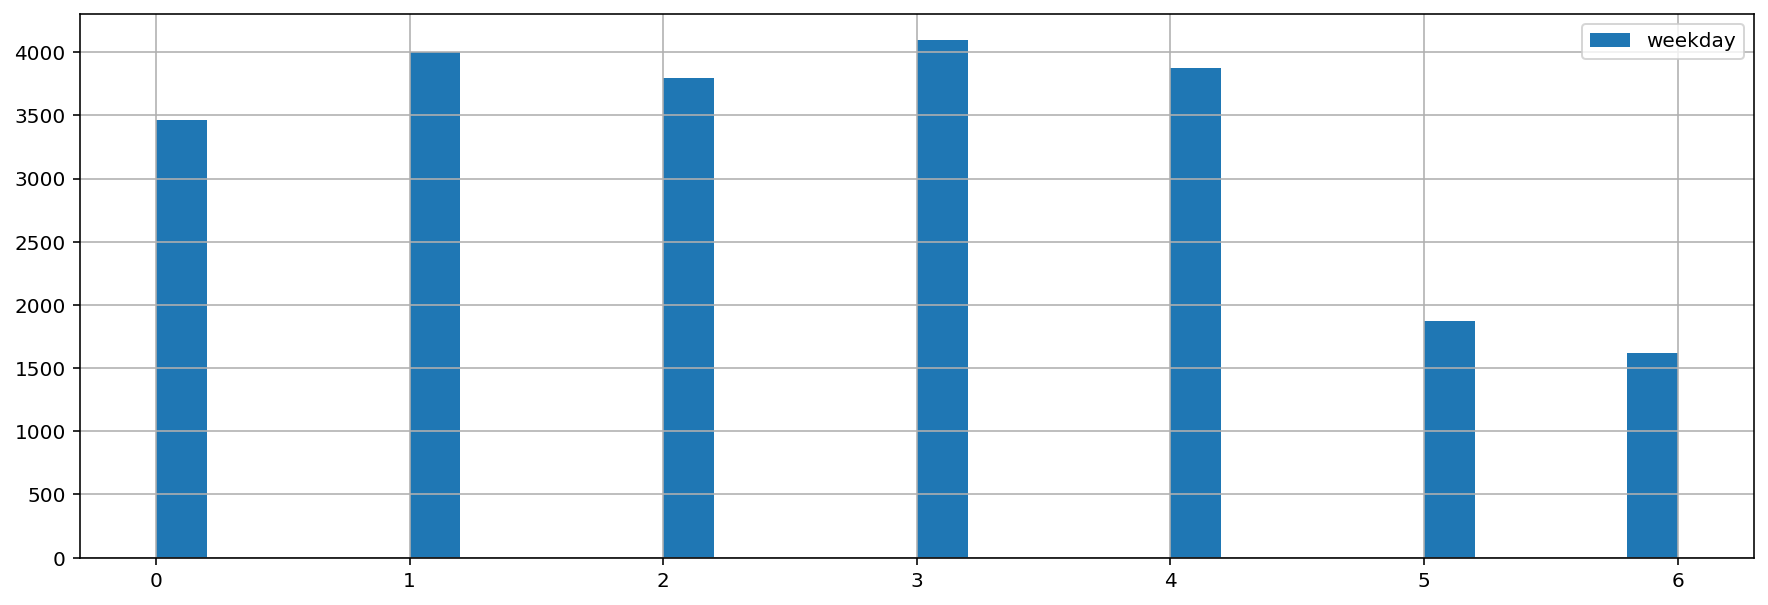

In [87]:
# Строим гистограмму для дня публикации объявления:
data['weekday'].hist(bins=30, figsize = (15,5), legend=True);

Как правило, объявления публикуют по вторникам, четвергам, средам и пятницам, чуть реже по понедельникам, и значительно реже других дней - в субботу и воскресенье (в выходные дни).

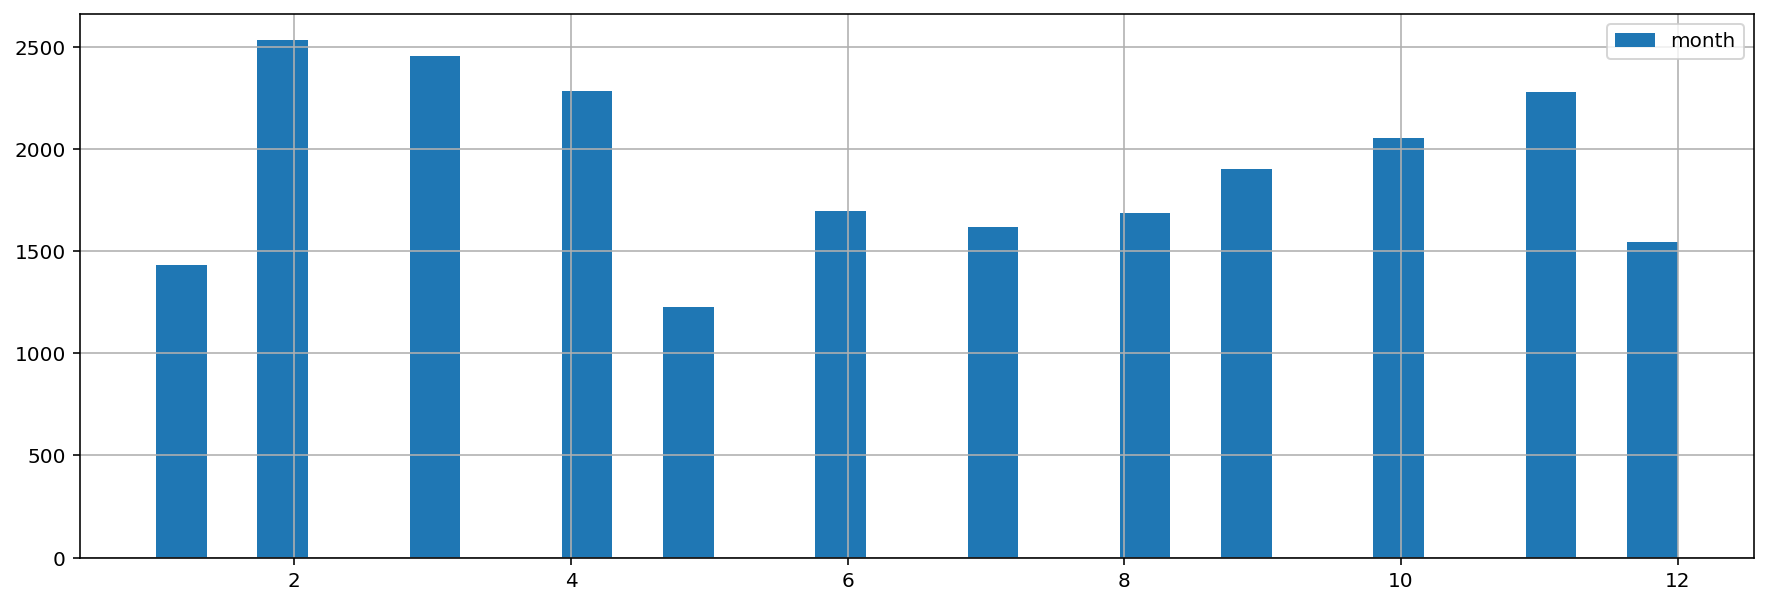

In [88]:
# Строим гистограмму для месяца публикации объявления:
data['month'].hist(bins=30, figsize = (15,5), legend=True);

Чаще, чем в других месяцах, объявления публикуют в феврале, марте, апреле (в начале года), октябре и ноябре (ближе к концу года). Меньше всего объявлений опубликовали в мае. 

### Исследование количества дней для продажи квартиры.

Строим гистрограмму для столбца, показывающего, сколько дней было размещено каждое объявление.

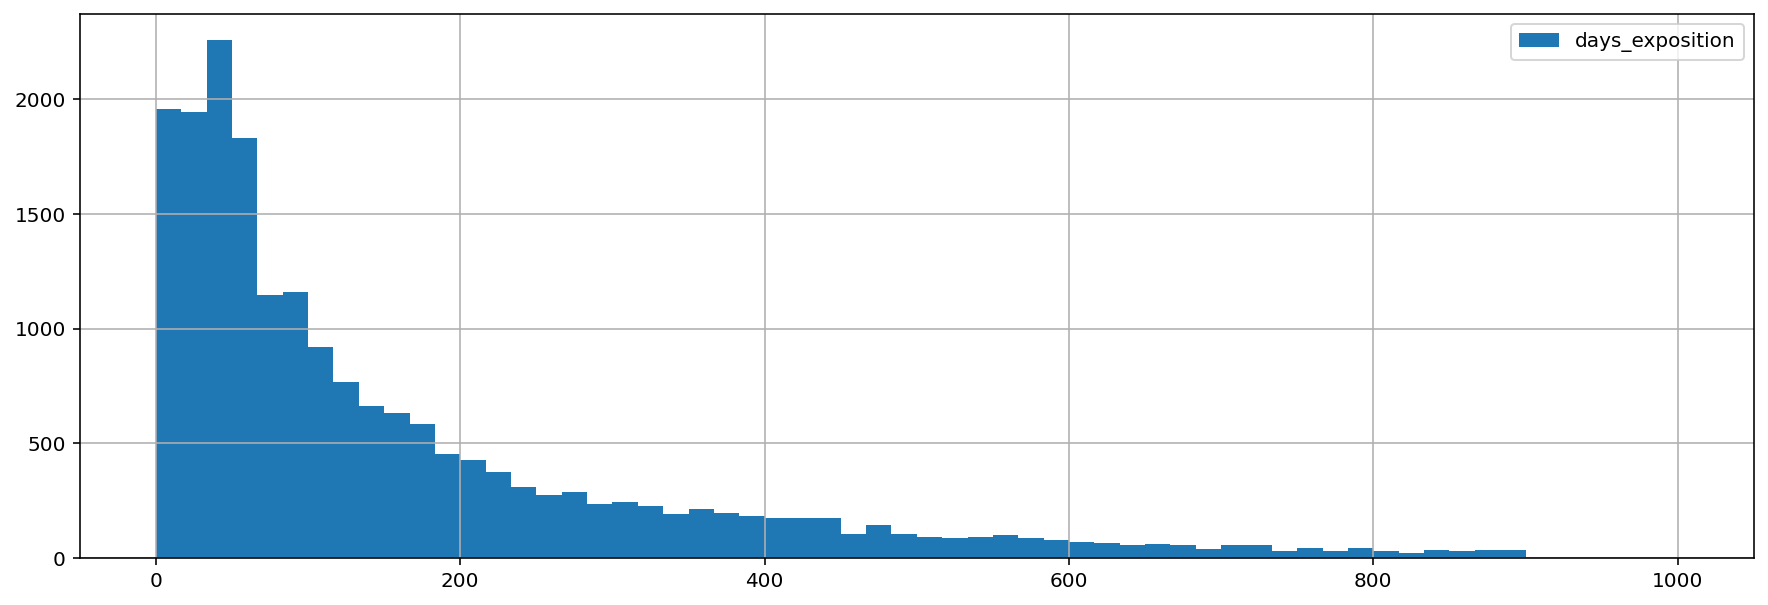

In [89]:
# Строим гистограмму для столбца days_exposition:
data['days_exposition'].hist(bins=60,range=(0,1000),figsize = (15,5), legend=True);

Считаем среднее и медиану для столбца days_exposition.

In [90]:
#Считаем среднее методом mean() b и округлим до целых методом round():
data['days_exposition'].mean().round()

162.0

In [91]:
#Считаем среднее методом median():
data['days_exposition'].median()

92.0

К данному типу  распределения больше подходит определение среднего времени продажи по медиане. Таким образом, обычно, продажа занимает в среднем 92 дня. 


Определим быстрые и необычно долгие продажи квартир.

In [92]:
# Смотрим значения параметров столбца 'days_exposition' на 25 и 75 квантилях методом quantile():

(
    data[['days_exposition']].quantile([0.25, .75]).style.format("{:,.2f}")
)

,days_exposition
0.25,44.00
0.75,216.00


Таким образом, быстрыми можно считать продажи до 44 дней, а необычно долгими - свыше 216 дней.

### Исследование факторов, влияющих на полную стоимость квартиры

Изучим, зависит ли цена от: общей площади; жилой площади; площади кухни; количества комнат; этажа, на котором расположена квартира (первый, последний, другой); даты размещения (день недели, месяц, год).
Построим графики, которые покажут зависимость цены от указанных выше параметров. 


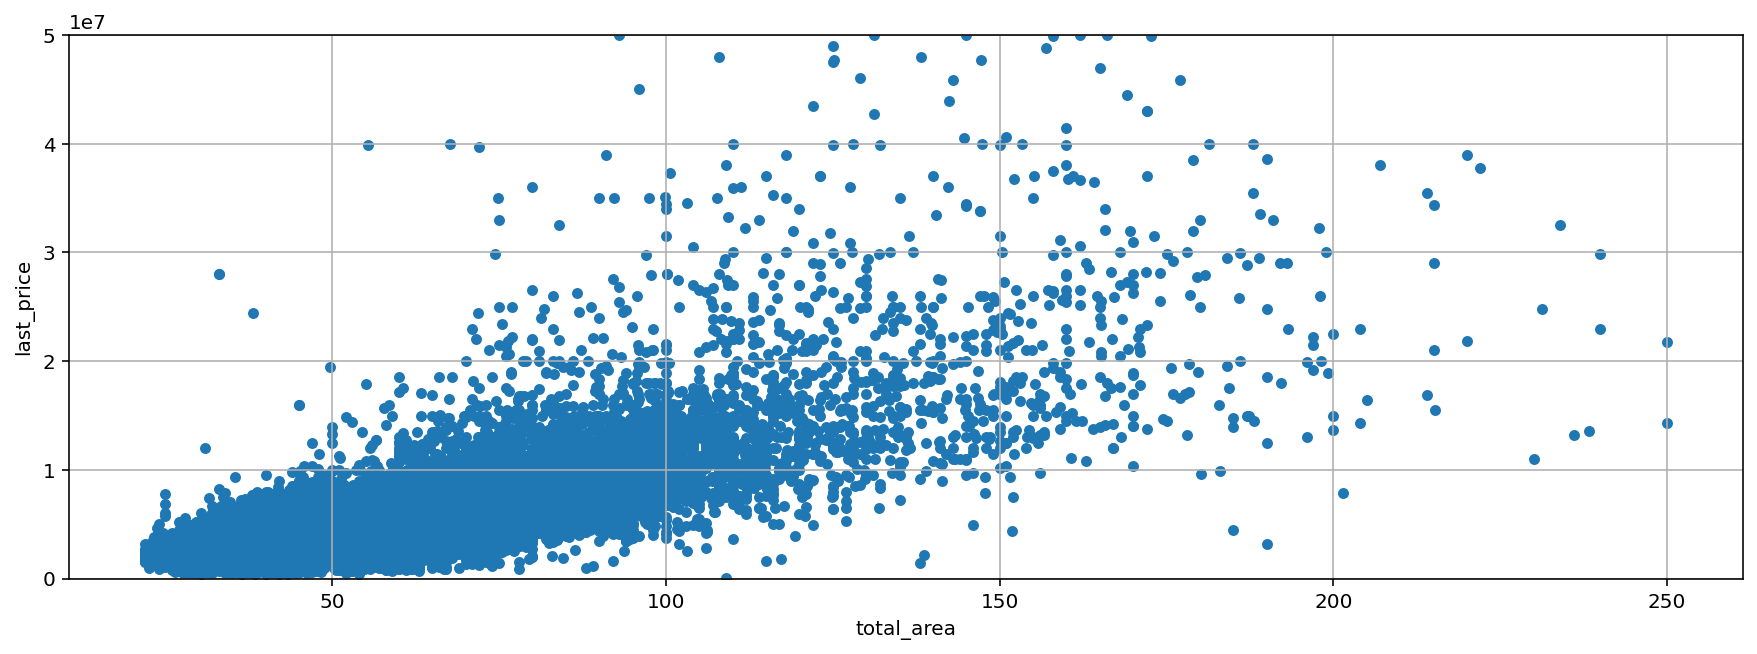

In [93]:
# Строим график зависимости общей (полной) стоимости квартиры от ее общей площади, используя
# метод plot() и вид графика scatter:

data.plot(x='total_area', y='last_price',ylim=(0,5*1e7), kind='scatter',figsize=(15, 5),grid=True); 


Как и следовало ожидать, общая стоимость квартиры растет с увеличением ее общей площади.

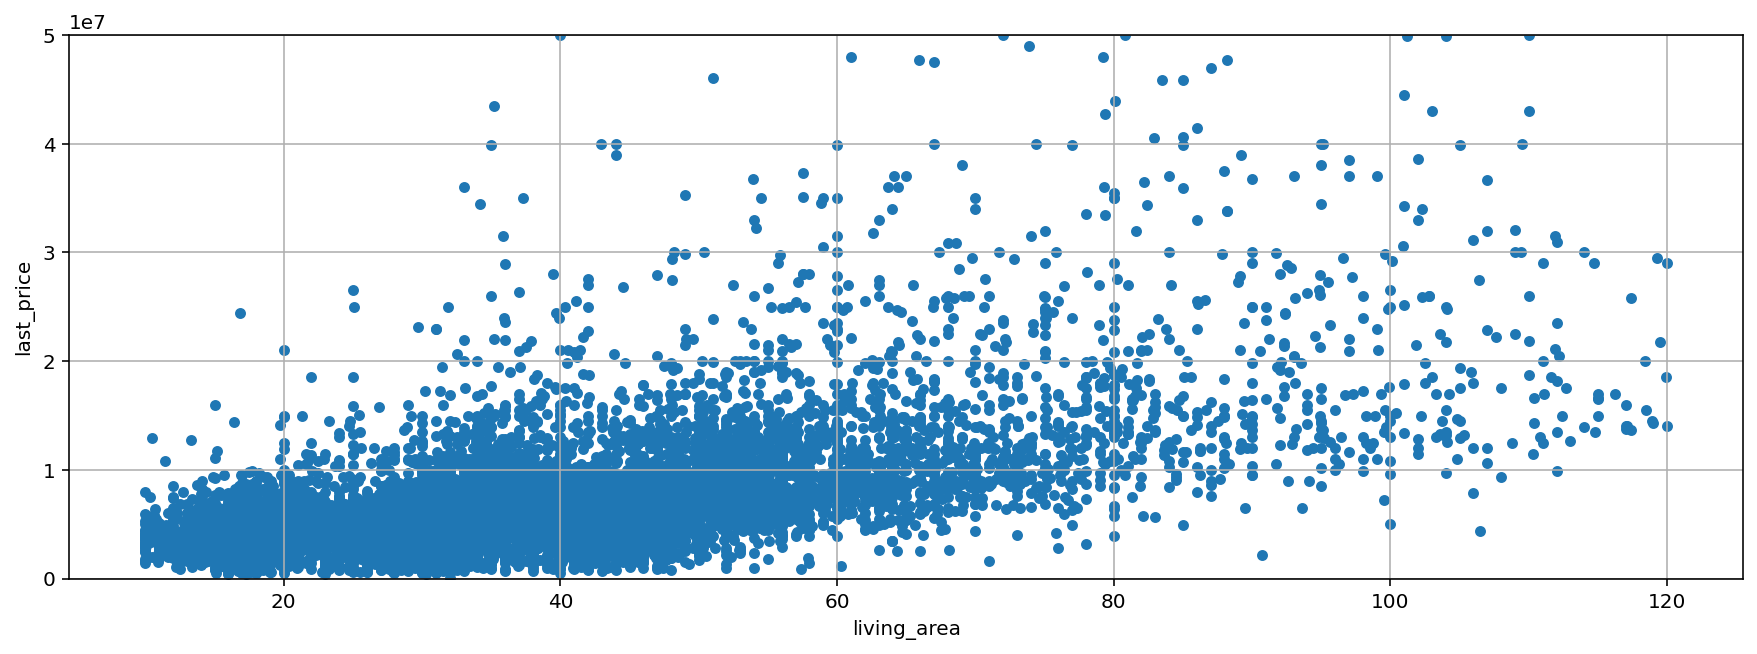

In [94]:
# Строим график зависимости общей (полной) стоимости квартиры от жилой площади, используя
# метод plot() и вид графика scatter:

data.plot(x='living_area', y='last_price', ylim=(0,5*1e7), kind='scatter',figsize=(15, 5),grid=True); 

Общая стоимость квартиры растет с увеличением ее жилой площади, по-видимому, в связи с тем, что, как правило, с увеличением жилой площади растет и общая площадь квартиры.

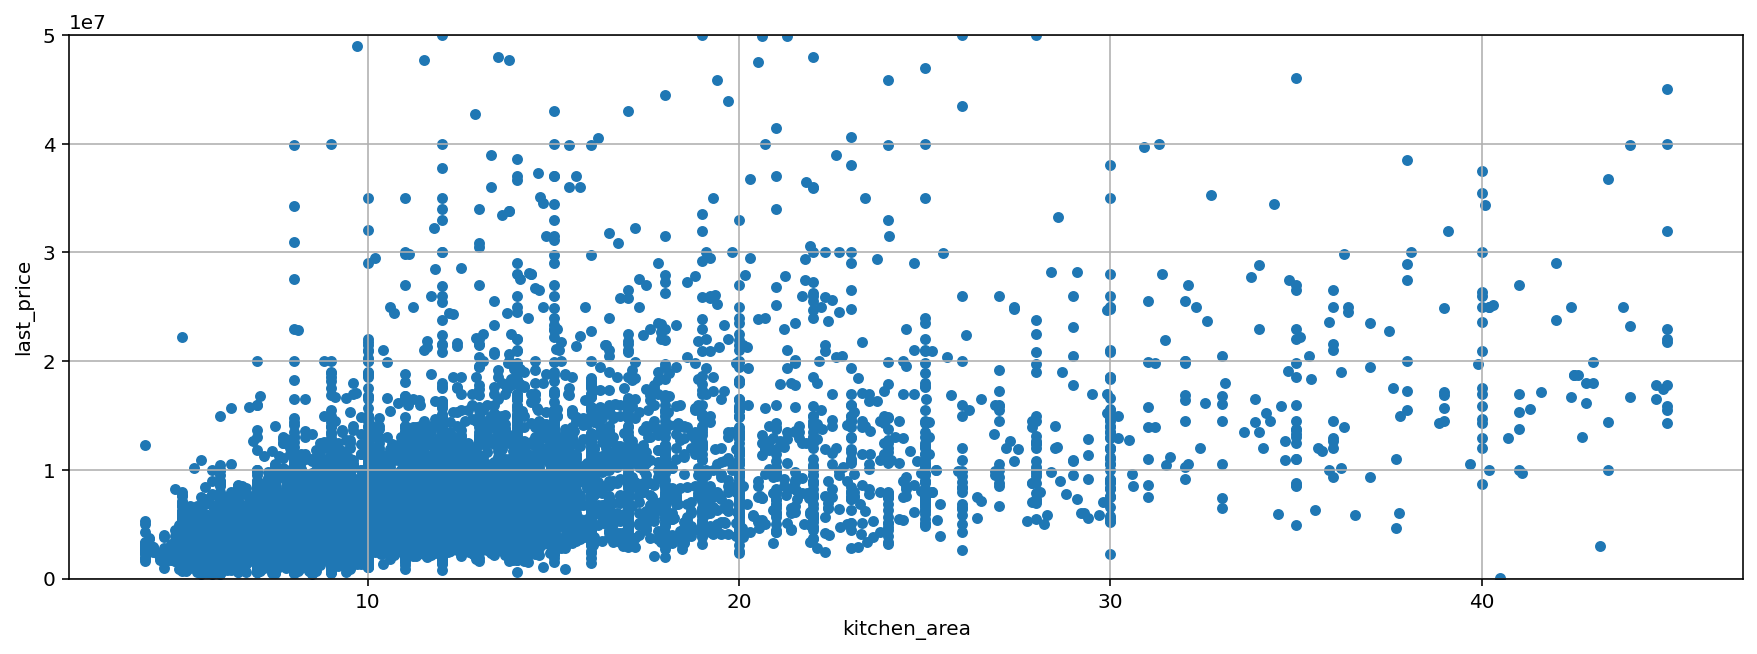

In [95]:
# Строим график зависимости общей (полной) стоимости квартиры от площади кухни, используя
# мметод plot() и вид графика scatter:

data.plot(x='kitchen_area', y='last_price',ylim=(0,5*1e7), kind='scatter',figsize=(15, 5),grid=True); 

Общая стоимость квартиры возрастает с увеличением площади ее кухни, по-видимому, чаще с увеличением площади кухни растет и общая площадь квартиры.

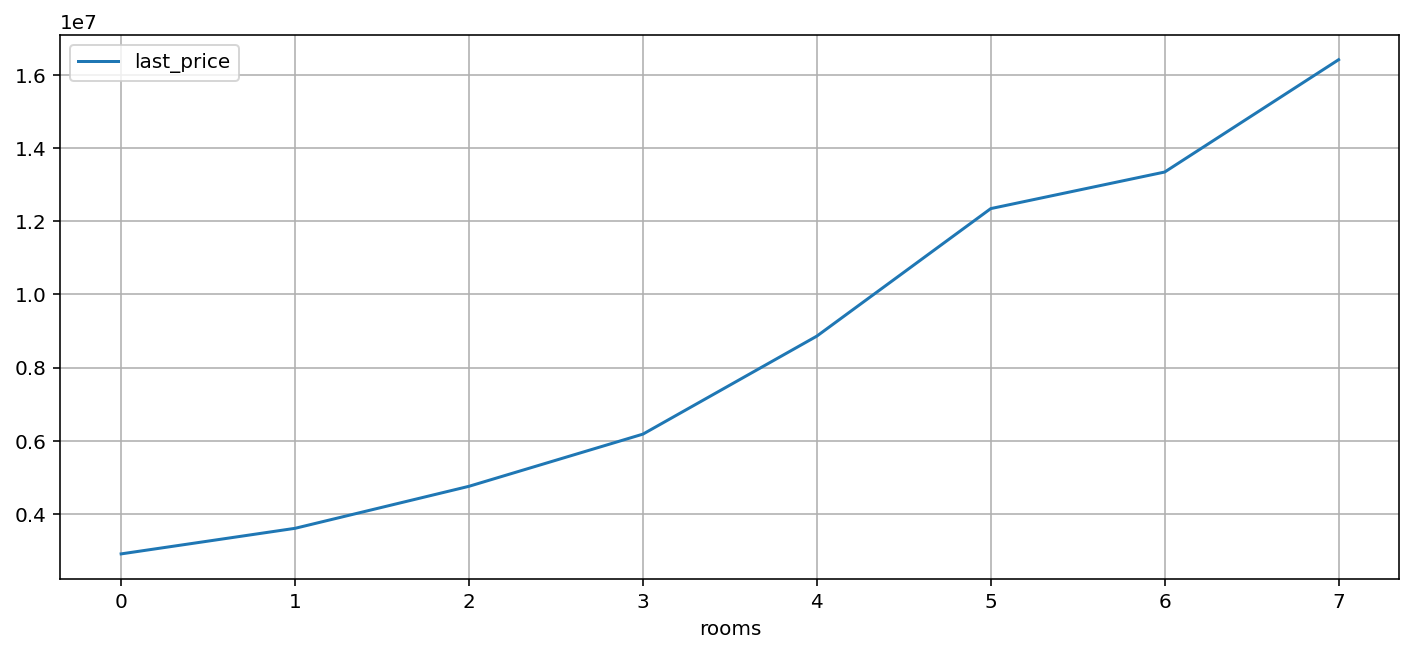

In [96]:
# Строим график зависимости общей (полной) стоимости квартиры от количества комнат, используя
# методы pivot_table() и plot():
(data.pivot_table(index='rooms', values='last_price', aggfunc='median').plot
 (grid=True, figsize=(12, 5)));

Чем больше в квартире комнат, тем выше ее цена. На графике видна практически прямопропорциональная зависимость цены квартиры от количества комнат, проверим, есть ли линейная связь между этими параметрами.

In [97]:
#Посчитаем коээфициент Пирсона методом corr(): 
data['rooms'].corr(data['last_price'])

0.37944407663015167

Однако, коэффициент корреляции ближе к 0, чем к 1, что говорит о слабой линейной связи. 

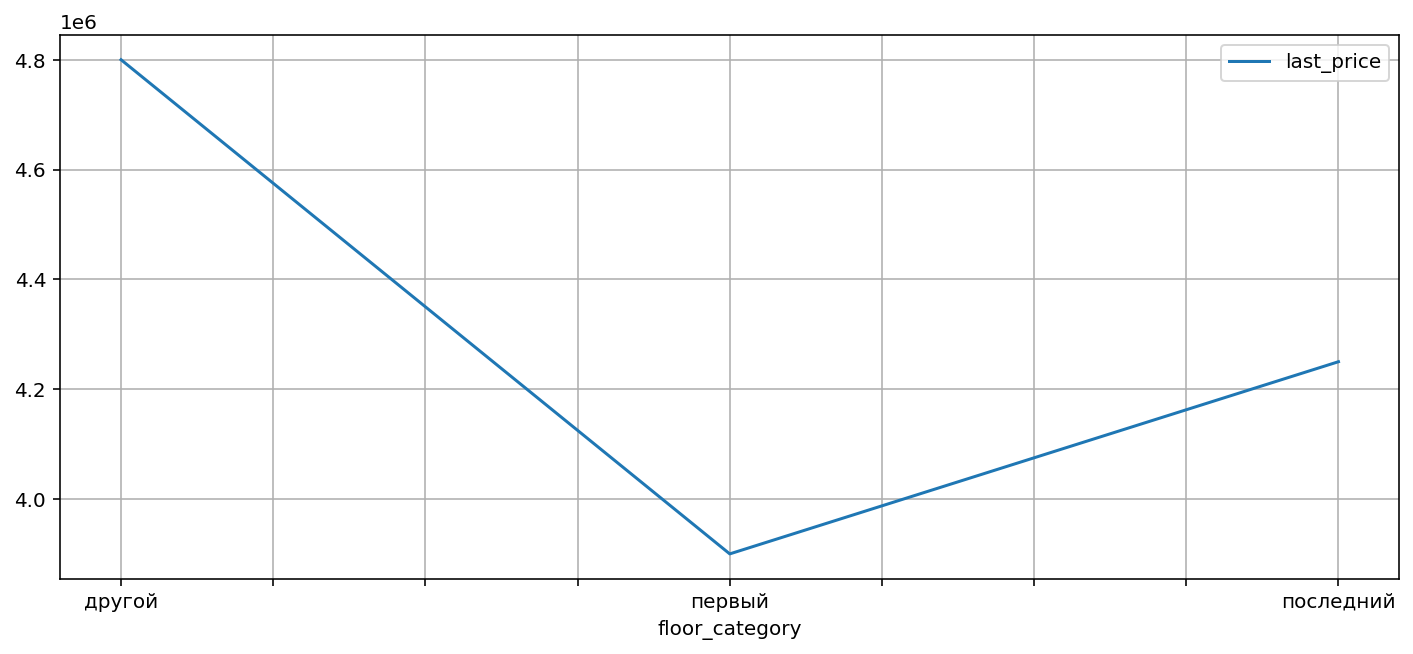

In [98]:
# Строим график зависимости общей (полной) стоимости квартиры от этажа, на котором она расположена квартира, 
# используя методы pivot_table() и plot():
(data.pivot_table(index='floor_category', values='last_price', aggfunc='median').plot
 (grid=True, figsize=(12, 5)));

Стоимость квартир на первом этаже, ниже, чем на других и последнем, при этом стоимость квартир на последнем этаже ниже, чем на этажах в категории другие.

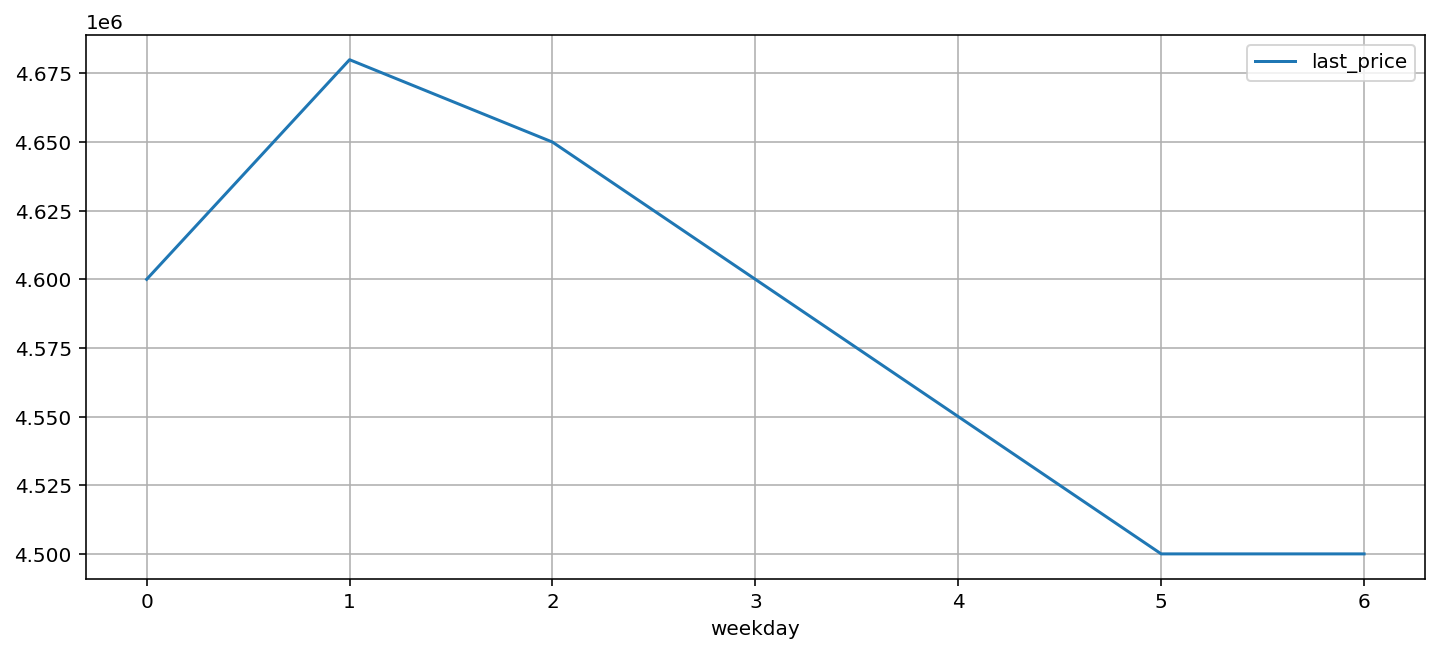

In [99]:
# Строим график зависимости общей (полной) стоимости квартиры от дня недели размещения объявления,
# используя методы pivot_table() и plot():
(data.pivot_table(index='weekday', values='last_price', aggfunc='median').plot
 (grid=True, figsize=(12, 5)));

Объявления с самыми дорогими квартирами выкладывают во вторник и среду, с самыми дешевыми - в пятницу и субботу. Со среды по пятницу наблюдается снижение стоимости квартир в выкладываемых объявлениях.

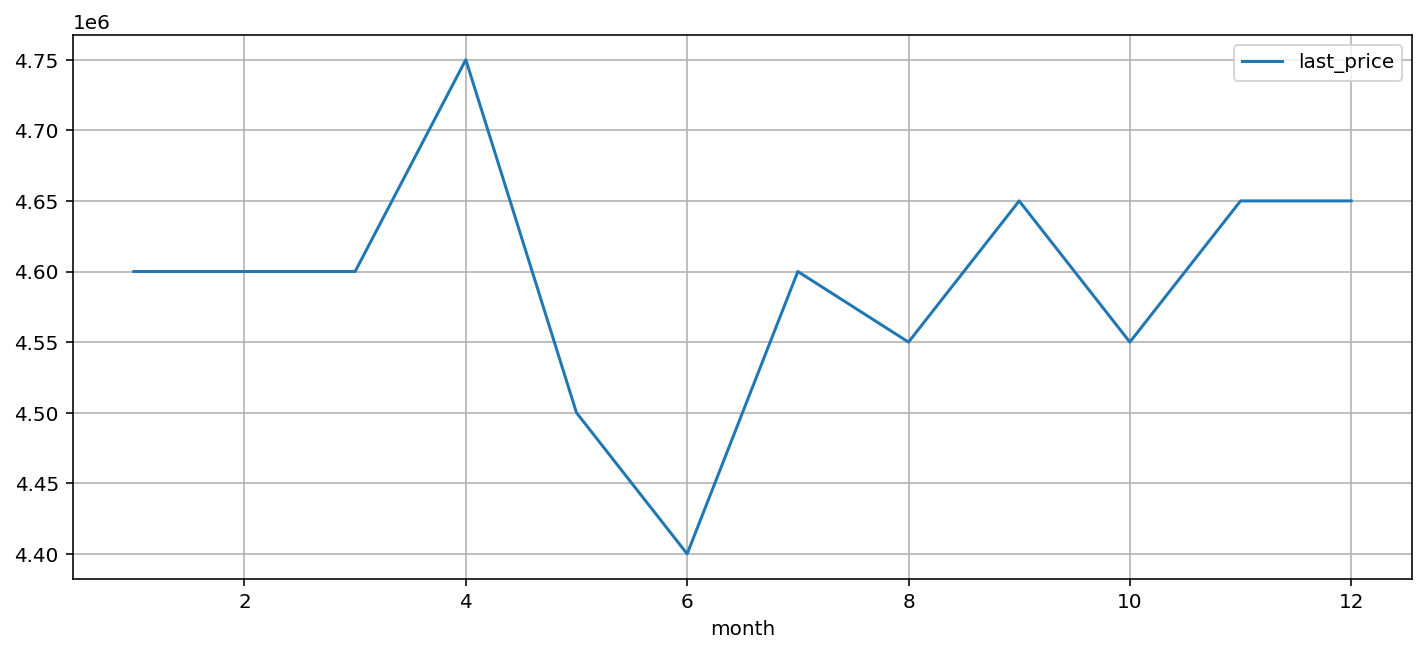

In [100]:
# Строим график зависимости общей (полной) стоимости квартиры от месяца размещения объявления,
# используя методы pivot_table() и plot():
(data.pivot_table(index='month', values='last_price', aggfunc='median').plot
 (grid=True, figsize=(12, 5)));

Наибольшее стоимость у квартир в объявлениях, опубликованных в апреле, а наименьшая - в июне. Наибольшее снижение стоимости квартир в объявлениях происходит в период с апреля по июнь. С июля по февраль наблюдается скачкообразное изменение стоимости в диапазоне от 4,4 до 4,5 млн рублей.

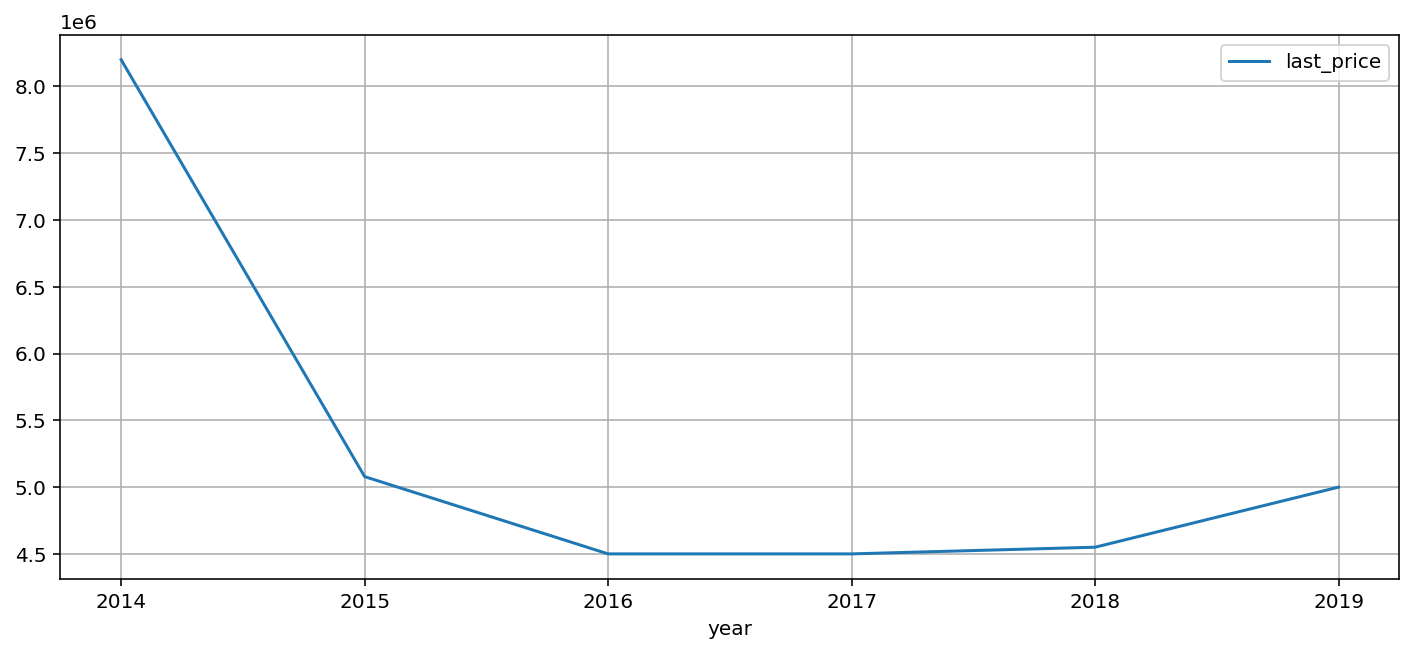

In [101]:
# Строим график зависимости общей (полной) стоимости квартиры от года размещения объявления,
# используя методы pivot_table() и plot():
(data.pivot_table(index='year', values='last_price', aggfunc='median').plot
 (grid=True, figsize=(12, 5)));

С 2014 по 2016 год стоимость квартир снижалась, в среднем на 3 млн рублей. С 2016 года по 2017 год средняя стоимость квартиры не изменялась. Некоторый рост стоимости наблюдается с 2017 до 2019 год (с 4,5 млн до 5 млн рублей).

Посмотрим, как изменялась общая площадь квартир, выставляемых на продажу, по годам.  

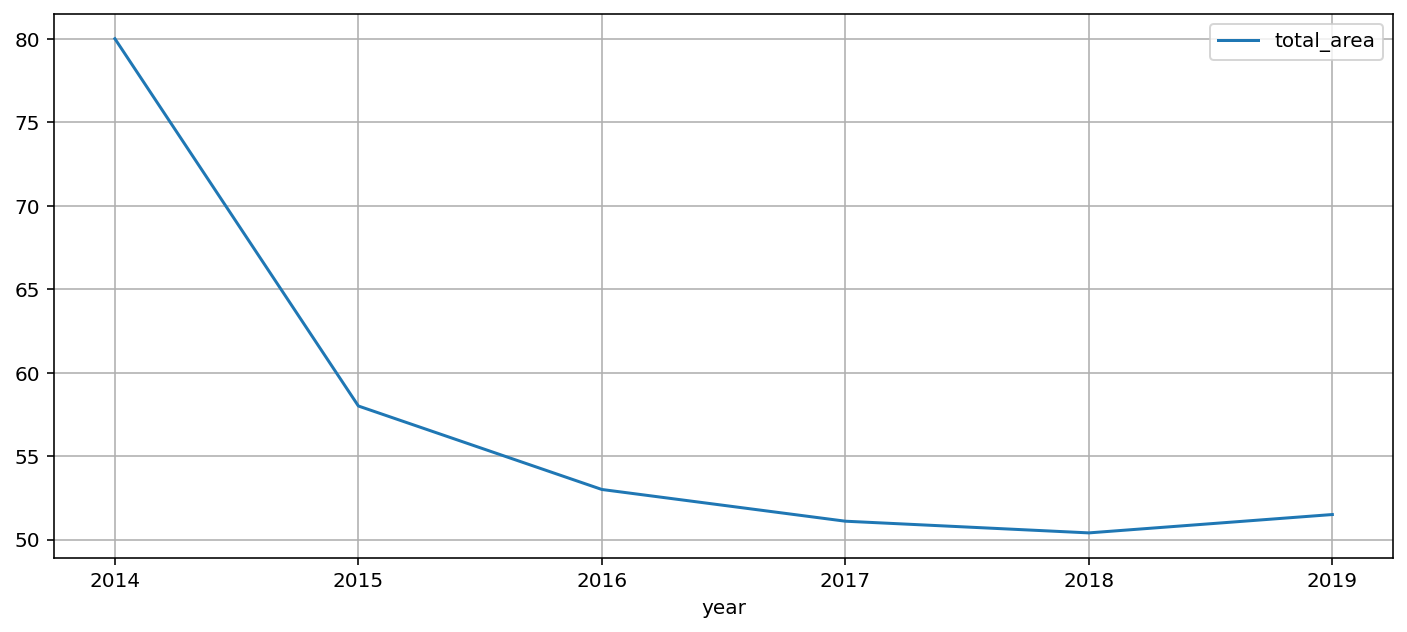

In [102]:
# Строим график зависимости общей площади квартиры от года размещения объявления,
# используя методы pivot_table() и plot():
(data.pivot_table(index='year', values='total_area', aggfunc='median').plot
 (grid=True, figsize=(12, 5)));

Общая площадь квартир, выставляемых на продажу, уменьшалась с 2014 по 2018 год. Так в 2014 она в среднем была равна 80 м2,а в 2018 - 51 м2, а с 2017 по 2018 год ее изменение было небольшим. Лишь с 2018 по 2019 год наблюдается незначительный рост общей площади.

Также исследуем, как зависело количество объявлений о квартирах, выставляемых на продажу, от года их опубликования.  

In [103]:
# Найдем количество объявлений на продажу квартир в каждом году,используя метод pivot_table():

data_year = data.pivot_table(index=['year'], values='total_area', aggfunc=['count'])
data_year.columns = ['Количество объявлений']
data_year

,Количество объявлений
year,
2014,77
2015,886
2016,2630
2017,7973
2018,8324
2019,2822


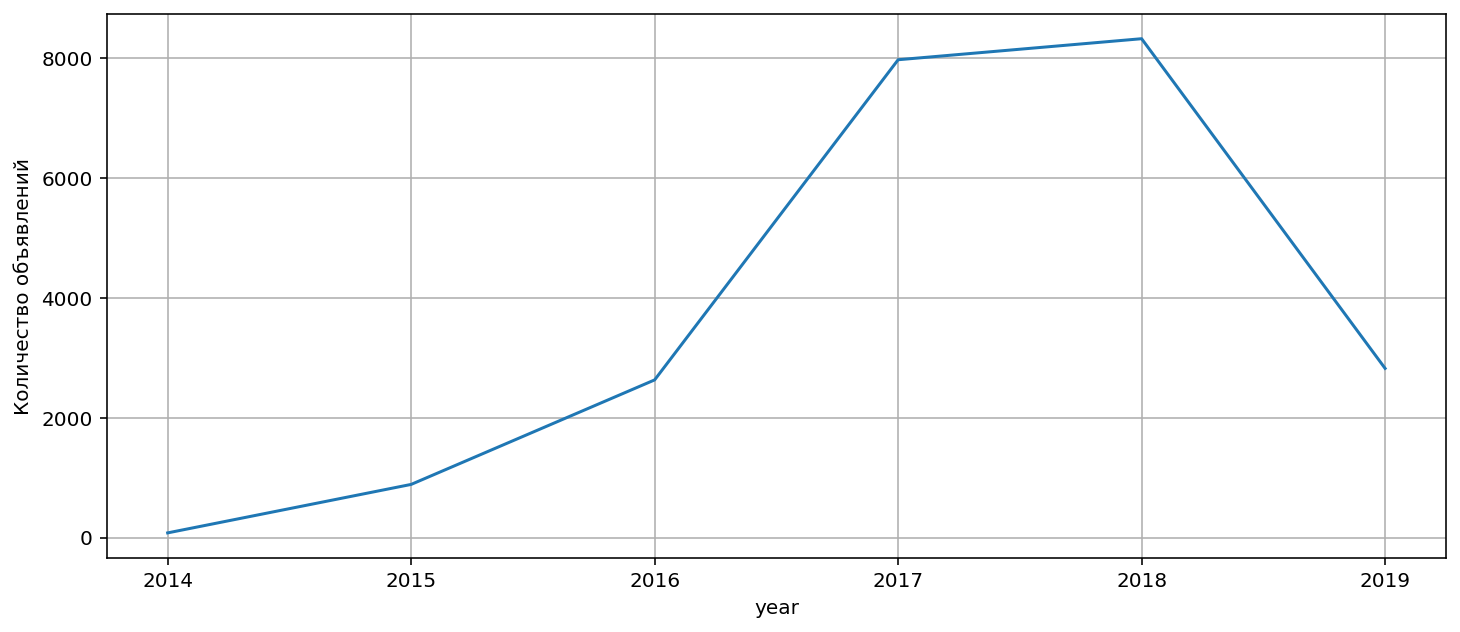

In [104]:
# Строим график зависимости количества объялений от года их размещения,используя методы pivot_table() и plot():
(
data.pivot_table(index=['year'], values='total_area', aggfunc=['count']).plot(grid=True, legend=False, 
                 ylabel = 'Количество объявлений', figsize=(12, 5))
);


Из графика видно, что с 2014 по 2018 год число объявлений о продаже квартир росло (особенно сильно с 2016 по 2017 год) и начало резко уменьшаться с 2018 по 2019 год.

Таким образом, можно сделать вывод, что снижение с 2014 по 2016 год и рост стоимости квартир с 2017 до 2019 год могут быть связаны и с тем, что с 2014 по 2016 год общая площадь квартир уменьшалась, количество выставляемых на продажу квартир росло, а с 2018 по 2019 - площадь квартир начала увеличиваться,  количество объявлений об их продаже  - уменьшаться. С 2016 года по 2017 год средняя стоимость квартиры не изменялась, так как и площадь квартиры и количество объявлений сильно не изменились за этот период.

### Анализ десяти населённых пунктов с наибольшим числом объявлений, анализ стоимости квадратного метра.

Выделяем населенные пункты, имеющие наибольшее число объявлений, с самой высокой и самой низкой стоимостью жилья за 1 квадратный метр.

In [105]:
# Делаем по датафрейму data сводную таблицу data_loc методом pivot_table(): 
# группируем данные по столбцу 'locality_name', по значениям из столбца 'price_1_m' 
# находим среднюю среднюю цену одного квадратного метра в всех населённых пунктах функцией mean() и 
# количество объявлений в каждом населенном пункте функцией count():

data_loc = data.pivot_table(index=['locality_name'], values='price_1_m', aggfunc=['mean', 'count'])

#Переименовываем столбцы:
data_loc.columns = ['Средняя цена за 1 кв.м','Число объявлений']

# Округляем значения столбца'Средняя цена за 1 кв.м' до целых методом round():
data_loc['Средняя цена за 1 кв.м'] = data_loc['Средняя цена за 1 кв.м'].round()

# Сортируем по уменьшению количества объявлений в датафрейме и выводим его первые 10 строк: 
data_loc.sort_values('Число объявлений',ascending=False).head(10)

,Средняя цена за 1 кв.м,Число объявлений
locality_name,,
Санкт-Петербург,112921.0,14955
Мурино,85957.0,564
Кудрово,95351.0,459
Шушары,78492.0,433
Всеволожск,68751.0,388
Пушкин,102798.0,348
Колпино,75282.0,333
Парголово,90175.0,322
Гатчина,68954.0,302


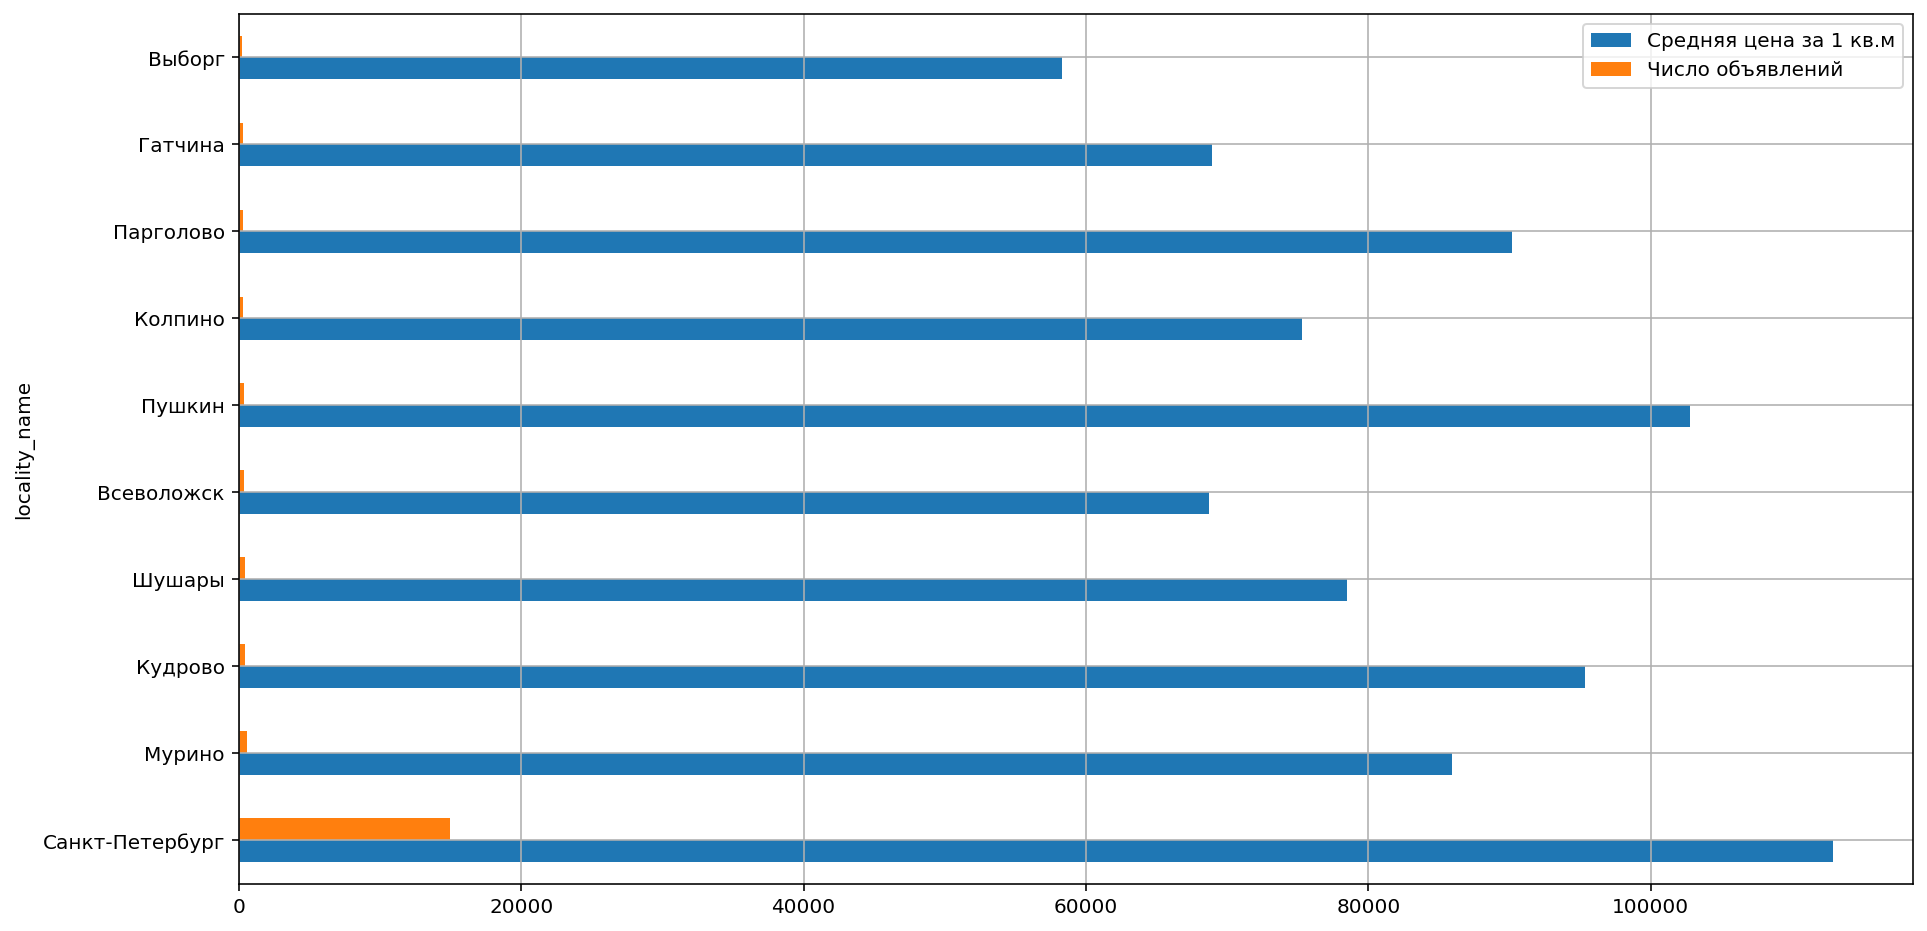

In [106]:
# Строим график методом plot() и выбираем вид графика 'barh':
data_loc.sort_values('Число объявлений',ascending=False).head(10).plot(kind='barh', grid=True, figsize=(15, 8));


Среди жилья с наибольшим числом объявлений самая высокая стоимость 1 кв.м в Санкт-Петербурге - 112 921 руб, самая низкая -  в Выборге (58 300 руб).

### Анализ изменения цены квадратного метра в Санкт-Петербурге для каждого километра по степени удалённости от центра.

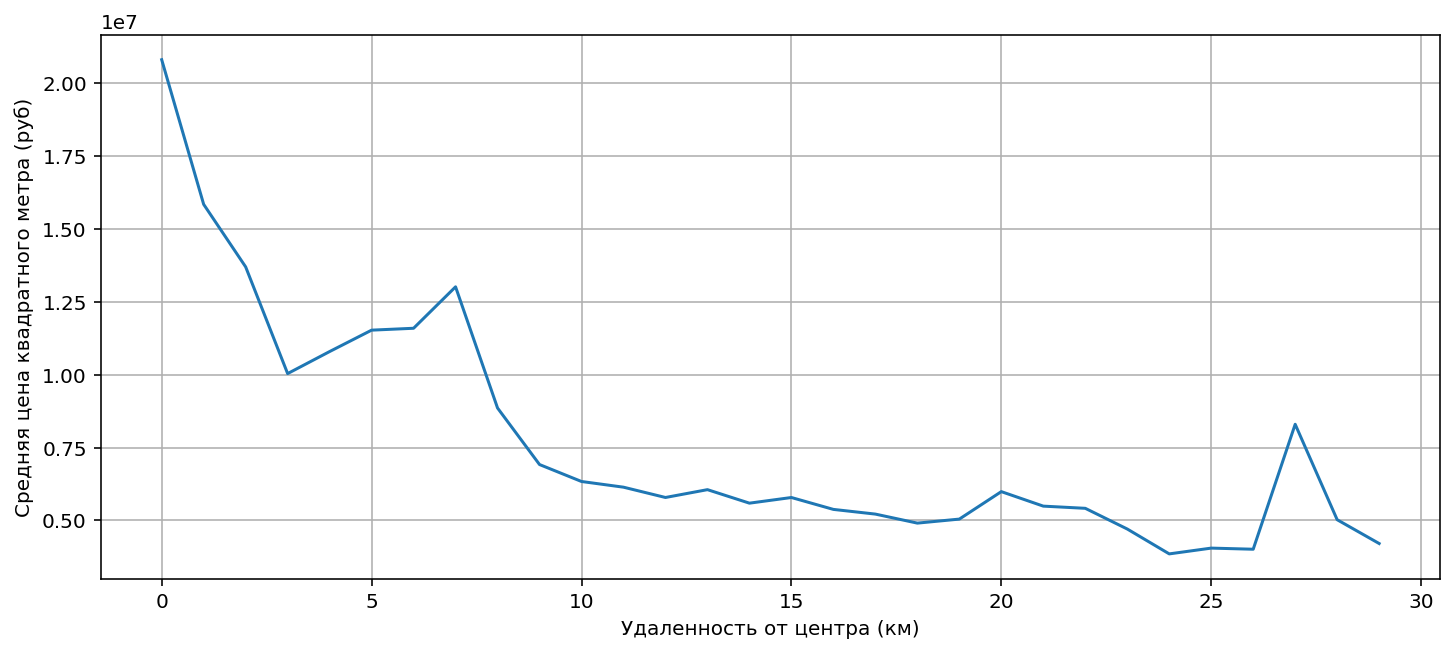

In [107]:
# С помощью метода loc() создаем датафрейм data_spb с объвлениями только в Санкт-Петербурге:
data_spb = data[data['locality_name'] == 'Санкт-Петербург']
# Делаем по датафрейму data_spb сводную таблицу методом pivot_table(): группируем данные по столбцу с расстоянием до центра 
# города 'centre_dist', по значениям из столбца 'last_price' находим среднюю цену одного квадратного метра 
# в Санкт-Петербурге функцией mean() и строим для наглядности график методом plot():
(
data_spb.pivot_table(index=['centre_dist'], values='last_price', aggfunc=['mean']).plot(grid=True, legend=False, 
                     ylabel = 'Средняя цена квадратного метра (руб)',xlabel = 'Удаленность от центра (км)', figsize=(12, 5))
);

Как и следовало ожидать, в центре города самое дорогое жилье, при увеличении расстояния от центра города до 29 км цена снижается, наблюдаемые при этом скачки цены можно объяснить влиянием других факторов, например площади квартиры, количества комнат и т.д. 

<div class="alert alert-success">
<font size="4", color= "seagreen"><b>✔️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />
Молодец, у тебя получилось сгруппировать и построить график изменения средней цены в зависимости от расстояния до центра
        

Изучим зависимость данных, которые влияют на общую стоимость квартиры(общая площадь квартиры, количество комант) и  могли привести к выбросу на 27 км, от расстояния до центра города.

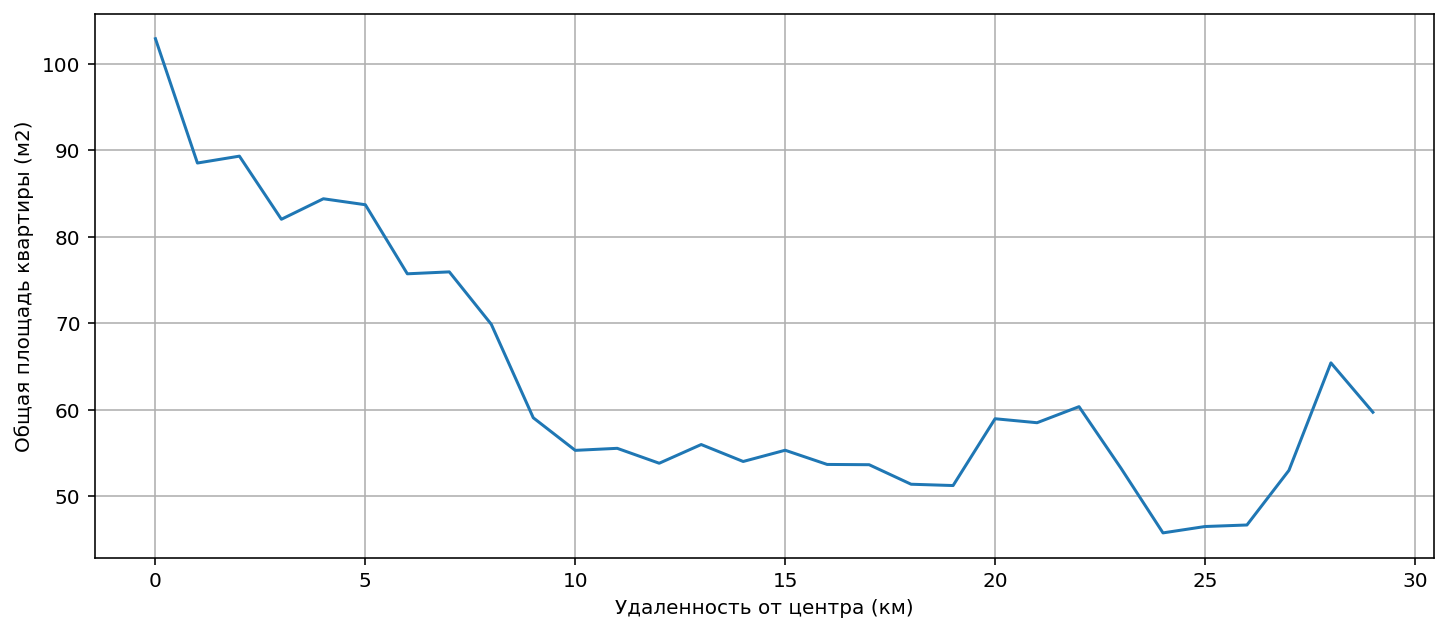

In [108]:
# Делаем по датафрейму data_spb сводную таблицу методом pivot_table(): группируем данные по столбцу с расстоянием до центра 
# города 'centre_dist', по значениям из столбца 'total_area' находим среднюю площадь квартиры 
# в Санкт-Петербурге функцией mean() и строим для наглядности график методом plot():
(
data_spb.pivot_table(index=['centre_dist'], values='total_area', aggfunc=['mean']).plot(grid=True, legend=False, 
                     ylabel = 'Общая площадь квартиры (м2)',xlabel = 'Удаленность от центра (км)', figsize=(12, 5))
);

Общая площадь квартиры уменьшается при удалении от центра, однако на 20-ом, 22-ом км наблюдается ее некоторый рост и падение на 24 км. На 27 км площадь квартиры резко возрастает.

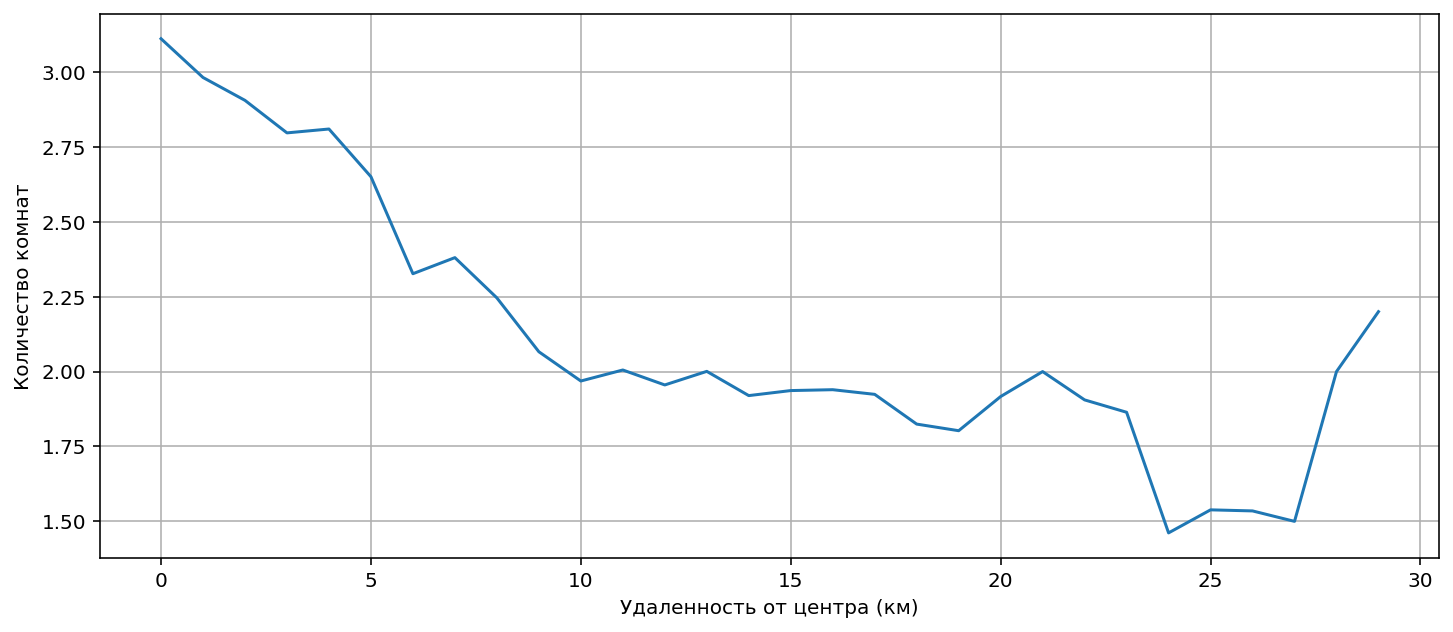

In [109]:
# Делаем по датафрейму data_spb сводную таблицу методом pivot_table(): группируем данные по столбцу с расстоянием до центра 
# города 'centre_dist', по значениям из столбца 'rooms' находим среднее количество комнат в квартире 
# в Санкт-Петербурге функцией mean() и строим для наглядности график методом plot():
(
data_spb.pivot_table(index=['centre_dist'], values='rooms', aggfunc=['mean']).plot(grid=True, legend=False, 
                     ylabel = 'Количество комнат',xlabel = 'Удаленность от центра (км)', figsize=(12, 5))
);

Количество команат уменьшается при удалении от центра и практически те же изменения, как и в случае с общей площадью квартиры, происходят на 27-ом км - рост количества команта в квартирах.

Таким образом, скачок средней цены за 1 квадратный метр в Санкт-Петербурге на 27 км, может быть связан с увеличением общей площади квартир и количества комнат в них на этом же расстоянии от центра.

Посмотрим на количество квартир с разным типом этажа квартиры (первый, последний, другой), которые продаются на 3-м и 5-ом км, и какую долю они занимают, чтобы попробовать объяснить провал на графике изменения цены квадратного метра в Санкт-Петербурге для каждого километра при удаленности от центра 3 км и пик при 7 км. 

Найдем, какую долю занимают квартиры с каждым типом этажа от общего их числа на 3-ем км.

In [110]:
# Создадим датафрейм методом loc():
data_3km = data_spb.loc[data_spb['centre_dist'] == 3.0]

# Делаем сводную таблицу сводную таблицу методом pivot_table() и перезаписываем датафрейм:
data_3km = data_3km.pivot_table(index=['floor_category'], values='centre_dist', aggfunc=['count'])

#Переименовываем стобец:
data_3km.columns = ['Количество (3 км)']

# Выводим таблицу на экран:
data_3km

,Количество (3 км)
floor_category,
другой,188
первый,52
последний,70


In [111]:
data_3km['Количество (3 км)'] / data_3km['Количество (3 км)'].sum()

floor_category
другой       0.606452
первый       0.167742
последний    0.225806
Name: Количество (3 км), dtype: float64

Найдем, какую долю занимают квартиры с каждым типом этажа от общего их числа на 7-ом км.

In [112]:
# Создадим датафрейм методом loc():
data_7km = data_spb.loc[data_spb['centre_dist'] == 7.0]

# Делаем сводную таблицу сводную таблицу методом pivot_table() и перезаписываем датафрейм:
data_7km = data_7km.pivot_table(index=['floor_category'], values='centre_dist', aggfunc=['count'])

#Переименовываем стобец:
data_7km.columns = ['Количество (7 км)']

# Выводим таблицу на экран:
data_7km               


,Количество (7 км)
floor_category,
другой,308
первый,32
последний,57


In [113]:
# Найдем, какую долю занимают квартиры с каждым типом этажа от общего их числа на 7-ом км.
data_7km['Количество (7 км)'] / data_7km['Количество (7 км)'].sum()

floor_category
другой       0.775819
первый       0.080605
последний    0.143577
Name: Количество (7 км), dtype: float64

Доля квартир на первом этаже на расстоянии 3 км практически в 2 раза выше, чем 7 км, а доля квартир на последнем этаже - в 1,5 раза. Количество квартир с другим типом этажа при увеличении расстония от 3 до 7 км увеличивается на 17 %. Как было установлено ранее, как правило, квартиры на первом и последнем этаже стоят дешевле, чем на других типах этажей. 

Таким образом снижение средней цены квартиры в Санкт-Петербурге за 1 квадратный метр при удаленности от центра 3 км может быть связано с увеличением доли квартир на первом и последнем этажах, а рост цены при увеличении удаленности от 3 до 7 км - с уменьшением их доли и ростом доли квартир на этаже другого типа.

## Общий вывод

Полученные для анализа данные были обработаны следующим образом: заменены все пропуски в данных по числу балконов, в столбце с названием населенного пункта и в столбце является ли квартира апартаментами, удалили пропуски в столбце с количеством этажей в доме. Устранены неявные дубликаты в столбце с названиями населенных пунктов, устранены редкие и выбивающиеся значения изменен тип данных в некоторых столбцах таблицы, посчитаны и добавлены столбцы с ценой одного квадратного метра, днем, месяцем, годом публикации объявления и типом этажа квартиры, для получения значений последнего столбца выполнена категоризация данных, построены гистограммы для исследования параметров объектов: общей площади; жилой площади; площади кухни; цены объекта и т.д.,  построены сводные таблицы и графики для анализа стоимости одного квадратного метра в населенных пунктах с наибольшим числом объявлений и зависимости стоимости жилья в Санкт-Петербурге в зависимости от удаленности от его от центра.

Наиболее часто встречаются в объявлениях о продаже 1 или 2-х комнатные квартиры с высотой потолков 2,5 метра, которые имеют общую площадь около 45 квадратных метров, жилую площадь  17 или 18 квадратных метров, площадь кухни 6 или 10 квадратных метров и расположены в 5 или 9-этажных домах с 1 по 5 этаж.
Полная стоимость квартиры зависит от ее общей площади, в том числе от жилой площади и площади кухни, при увеличении этих площадей, как правило, растет и стоимость квартиры, которая также напрямую зависит и от числа комнат в квартире и этажа, на котором она расположена. При увеличении числа комнат и номера этажа растет и цена квартиры. Квартиры на первом и последнем этажах стоят обычно дешевле, чем квартиры на других этажах.
Объявления с самыми дорогими квартирами выкладывают по вторникам и средам в апреле, с самыми дешевыми – по пятницам и субботам в июне. Общая стоимость квартир с 2014 по 2016 г уменьшалась, с 2016 по 2017 практически не изменялась, а с 2017 по 2019 год наблюдался некоторый рост цен на квартиры. Это может быть связано в том числе со снижением общей площади выставляемых на продажу квартир с 2014 по 2016 год и с ее некоторым увеличением с 2017 по 2019 год, а также с увеличением числа квартир (объявлений об их продаже), выставляемых на продажу с 2017 по 2019 и их уменьшением с 2017 по 2019. Самое дорогое жилье, чаще других выставляющееся на продажу, в Санкт-Петербурге, самое дешевое в этой категории – в Выборге. Как правило, стоимость жилья в Санкт-Петербурге уменьшается с увеличением его удаленности от центра города, однако,  стоит учитывать площадь квартиры, количество комнат в ней и этаж, на котором она расположена. Все эти факторы могут приводить к скачкам средней цены за квадратный метр как в центре города, так и в значительном отдалении от него. 
 

В дальнейшем для проведения более глубокого анализа рекомендуется проанализировать количество квартир со свободной планировкой, сколько квартир является аппартаментами или квартирой-студией и построить зависимость общей стоимости квартиры от этих данных и также от удаленности от квартир водоемов. Для уменьшения количества пропусков можно сделать такие пункты в объявлении, как название населенного пункта, площадь кухни и жилой зоны, обязательными для заполнения, улучшить программу по сбору картографических данных. 